# Описание проекта


Развлекательное приложение Procrastinate Pro+ несмотря на огромные вложения в рекламу, последние несколько месяцев терпит убытки.
ЦЕЛЬ ИССЛЕДОВАНИЯ — обнаружить причины и помочь компании выйти в плюс.

ИСТОЧНИКИ ДАННЫХ. Данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
лог сервера с данными об их посещениях,
выгрузка их покупок за этот период,
рекламные расходы.
ЗАДАЧИ:
выяснить, откуда приходят пользователи,
какими устройствами они пользуются,
сколько стоит привлечение пользователей из различных рекламных каналов,
сколько денег приносит каждый клиент,
когда расходы на привлечение клиента окупаются,
какие факторы мешают привлечению клиентов.

СТРУКТУРА ПРОЕКТА:
1. [Изучение и предобработка данных.](#start)
2. [Создание функций.](#functions)
3. [Исследовательский анализ данных](#data_research)
4. [Маркетинг.](#marketing)
5. [Оценка окупаемости рекламы.](#advertising)
4. [Общий вывод.](#outcome)

# Шаг 1. Загрузите данные и подготовьте их к анализу<a id="start"></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta


In [2]:
#visits = pd.read_csv('/datasets/visits_info_short.csv')
#orders = pd.read_csv('/datasets/orders_info_short.csv')
#costs = pd.read_csv('/datasets/costs_info_short.csv')


server_path_visits = '/datasets/visits_info_short.csv'   #сохраняем путь к файлу на сервере Практикума
local_path_visits = 'C:/datasets/visits_info_short.csv'               #сохраняем путь к файлу на компьютере 
server_path_orders = '/datasets/orders_info_short.csv'   #сохраняем путь к файлу на сервере Практикума
local_path_orders = 'C:/datasets/orders_info_short.csv'               #сохраняем путь к файлу на компьютере 
server_path_costs = '/datasets/costs_info_short.csv'
local_path_costs = 'C:/datasets/costs_info_short.csv'

try:
    visits = pd.read_csv(server_path_visits)    #пробуем найти данные о фильмах по сетевому адресу
except: 
    visits = pd.read_csv(local_path_visits)     #если не находим по сетевому, ищем по локальному
else: FileNotFoundError
    
try:
    orders = pd.read_csv(server_path_orders)    #пробуем найти данные о кассовых сборах по сетевому адресу
except: 
    orders = pd.read_csv(local_path_orders)     #если не находим по сетевому, ищем по локальному
else: FileNotFoundError
    
    
try:
    costs = pd.read_csv(server_path_costs)    #пробуем найти данные о кассовых сборах по сетевому адресу
except: 
    costs = pd.read_csv(local_path_costs)     #если не находим по сетевому, ищем по локальному  
else: FileNotFoundError
    
display(visits.head())
display(orders.head())
display(costs.head())


User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [3]:
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   

In [4]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

In [5]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])
display(visits.head())
display(orders.head())
display(costs.head())
visits.info()
orders.info()
costs.info()

user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

dt   channel  costs
0 2019-05-01  FaceBoom  113.3
1 2019-05-02  FaceBoom   78.1
2 2019-05-03  FaceBoom   85.8
3 2019-05-04  FaceBoom  136.4
4 2019-05-05  FaceBoom  122.1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

In [6]:
#Проверяю таблицы на пропущеные значения.
display(visits.isna().sum())
display(orders.isna().sum())
display(costs.isna().sum())


user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

dt         0
channel    0
costs      0
dtype: int64

In [7]:
#Проверяю отсутствие дубликатов в таблицах visits и orders
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(visits['user_id'].duplicated().sum())
display(orders['user_id'].duplicated().sum())

0

0

159893

31331

Наличие дубликатов в колонках user_id таблиц visits и orders объясняются тем, что один и тот же пользователь мог посетить сайт и/или совершить покупку более одного раза. Дубликатов строк в обеих таблицах нет.

# Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии<a id="functions"></a>

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

In [8]:
# добавляем параметр costs — траты на рекламу
def get_profiles(visits, orders, costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )
    
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['dt'] = pd.to_datetime(profiles['dt'])

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()   # возвращаем dt и channel из индексов
    )
    new_users['dt'] = pd.to_datetime(new_users['dt'])
    
    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавим стоимость привлечения в профили
    
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    
    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
   
    return profiles  # возвращаем профили с CAC


In [9]:
def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # исключаем из расчётов канал щкпфтшс.
    profiles = profiles.query('channel != "organic"')
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        
        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    ltv, roi = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    ltv_history, roi_history = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        ltv,  # таблица LTV
        ltv_history,  # таблица динамики LTV
        roi,  # таблица ROI
        roi_history,  # таблица динамики ROI
    )

In [10]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window = 14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(30, 20))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


In [11]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):


    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # находим дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Строим таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )

        # Считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)

        # Вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Объединяем таблицы размеров когорт и конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)

        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    conversion = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики конверсии
    conversion_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, conversion, conversion_in_time 




In [12]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    retention = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    retention_history = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, retention, retention_history 

In [13]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

# Шаг 3. Проведите исследовательский анализ данных<a id="data_research"></a>

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [14]:
#Создаю таблицу с профилями пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head(10))

user_id            first_ts       channel   device         region  \
0    599326 2019-05-07 20:58:57      FaceBoom      Mac  United States   
1   4919697 2019-07-09 12:46:07      FaceBoom   iPhone  United States   
2   6085896 2019-10-01 09:58:33       organic   iPhone         France   
3  22593348 2019-08-22 21:35:48    AdNonSense       PC        Germany   
4  31989216 2019-10-02 00:07:44       YRabbit   iPhone  United States   
5  34186288 2019-05-09 17:29:23       organic  Android  United States   
6  38448301 2019-08-16 11:56:00       organic  Android  United States   
7  46006712 2019-06-30 03:46:29    AdNonSense  Android         France   
8  58263264 2019-05-11 19:18:43      FaceBoom   iPhone  United States   
9  59835779 2019-05-11 21:13:47  MediaTornado   iPhone  United States   

          dt      month  payer  acquisition_cost  
0 2019-05-07 2019-05-01   True          1.088172  
1 2019-07-09 2019-07-01  False          1.107237  
2 2019-10-01 2019-10-01  False          0.000000  
3 2019-08-22 2019-08-01  False          0.988235  
4 2019-10-02 2019-10-01  False          0.230769  
5 2019-05-09 2019-05-01  False          0.000000  
6 2019-08-16 2019-08-01  False          0.000000  
7 2019-06-30 2019-06-01   True          1.008000  
8 2019-05-11 2019-05-01  False          1.128205  
9 2019-05-11 2019-05-01  False          0.250435

In [15]:
# задаю момент и горизонт анализа данных
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14


# создаю опцию «игнорировать горизонт»
ignore_horizon = False

last_suitable_acquisition_date = observation_date
if not ignore_horizon:
    last_suitable_acquisition_date = observation_date - timedelta(
        days=horizon_days - 1
    )
    
    
#нахожу минимальную дату привлечения
min_analysis_date = profiles['dt'].min().date()
    
# исключаю пользователей, пришедших после максимальной даты привлечения
profiles_analysis = profiles.query('dt <= @last_suitable_acquisition_date')

display(profiles_analysis)
display("Максимальная дата привлечения нового пользователя: {}".format(last_suitable_acquisition_date))
display("Минимальная дата привлечения нового пользователя: {}".format(min_analysis_date))

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150002  999954865738 2019-07-25 08:47:56       organic      PC             UK   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

               dt      month  payer  acquisition_cost  
0      2019-05-07 2019-05-01   True          1.088172  
1      2019-07-09 2019-07-01  False          1.107237  
2      2019-10-01 2019-10-01  False          0.000000  
3      2019-08-22 2019-08-01  False          0.988235  
4      2019-10-02 2019-10-01  False          0.230769  
...           ...        ...    ...               ...  
150002 2019-07-25 2019-07-01  False          0.000000  
150003 2019-09-28 2019-09-01  False          3.500000  
150005 2019-07-23 2019-07-01  False          2.600000  
150006 2019-09-28 2019-09-01  False          0.205714  
150007 2019-10-18 2019-10-01  False          0.000000  

[142620 rows x 9 columns]

'Максимальная дата привлечения нового пользователя: 2019-10-19'

'Минимальная дата привлечения нового пользователя: 2019-05-01'

Максимальная дата привлечения пользователей 19 октября 2019 г. Минимальная дата - 1 мая 2019 г. - первая дата, за которую у нас есть данные.

In [16]:
#Группирую пользователей по странам.
profiles_regions = profiles_analysis.groupby('region')['user_id'].count().reset_index()
#Определяю количество платящих пользователей
profiles_regions['payers_number'] = profiles_analysis.query('payer == True').groupby('region')['user_id'].count().reset_index()['user_id']
#Нахожу долю платящих пользователей из каждой страны
profiles_regions['ratio'] = profiles_regions['payers_number'] / profiles_regions['payers_number'].sum()
profiles_regions = profiles_regions.sort_values(by = ['user_id', 'payers_number', 'ratio'], ascending = False)

display(profiles_regions)

region  user_id  payers_number     ratio
3  United States    95042           6549  0.777791
2             UK    16710            659  0.078266
0         France    16624            628  0.074584
1        Germany    14244            584  0.069359

Пользователи приходят из четырёх стран. 77.8% платящих пользователей приходят из США.

In [17]:
#Группирую пользователей по устройствам.
users_device = profiles_analysis.groupby('device')['user_id'].count().reset_index()
#Определяю количество платящих пользователей:
users_device['payers_number'] = profiles_analysis.query('payer == True').groupby('device')['user_id'].count().reset_index()['user_id']
#Нахожу долю платящих пользователей от их общего числа для каждого устройства:
users_device['ratio'] = users_device['payers_number'] / users_device['user_id']
#Нахожу долю владельцев каждого устройства среди платящих пользователей:
users_device['ratio_device'] = users_device['payers_number'] / users_device['payers_number'].sum()
users_device = users_device.sort_values(by =  ['user_id', 'payers_number', 'ratio', 'ratio_device'], ascending = False)

display(users_device)


device  user_id  payers_number     ratio  ratio_device
3   iPhone    51766           3201  0.061836      0.380166
0  Android    33288           1954  0.058700      0.232067
2       PC    28978           1439  0.049658      0.170903
1      Mac    28588           1826  0.063873      0.216865

Пользователи заходят в приложение с четырёх видов устройств. Наибольшее количество платящих пользователей предпочитают iPhone. Платящие пользователи так чаще всего пользуются iPhone.

In [18]:
#Cтрою таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
users_channel = profiles_analysis.groupby('channel')['user_id'].count().reset_index()
users_channel['payers_number'] = profiles_analysis.query('payer == True').groupby('channel')['user_id'].count().reset_index()['user_id']
users_channel['ratio'] = (users_channel['payers_number'] / users_channel['user_id'])
users_channel = users_channel.sort_values(by = ['user_id', 'payers_number', 'ratio'], ascending = False)
users_channel = users_channel
display(users_channel)
#Определяю  каналы, из которых пришло больше всего платящих пользователей в абсолютных значениях.
users_channel_max = users_channel.sort_values(by = ['user_id', 'payers_number', 'ratio'], ascending = False)
display(users_channel_max.head())
#Определяю  каналы, для которых свойственны самые большие доли платящих от числа привлечённых пользователей
users_channel_ratio = users_channel.sort_values(by = ['ratio', 'payers_number', 'user_id'], ascending = False)
display(users_channel_ratio.head())


channel  user_id  payers_number     ratio
10             organic    53976           1110  0.020565
1             FaceBoom    27544           3362  0.122059
6               TipTop    18498           1785  0.096497
4   OppleCreativeMedia     8139            220  0.027030
2              LeapBob     8103            243  0.029989
7       WahooNetBanner     8082            428  0.052957
5       RocketSuperAds     4251            335  0.078805
3         MediaTornado     4167            148  0.035517
8              YRabbit     4102            156  0.038030
0           AdNonSense     3702            413  0.111561
9       lambdaMediaAds     2056            220  0.107004

channel  user_id  payers_number     ratio
10             organic    53976           1110  0.020565
1             FaceBoom    27544           3362  0.122059
6               TipTop    18498           1785  0.096497
4   OppleCreativeMedia     8139            220  0.027030
2              LeapBob     8103            243  0.029989

channel  user_id  payers_number     ratio
1        FaceBoom    27544           3362  0.122059
0      AdNonSense     3702            413  0.111561
9  lambdaMediaAds     2056            220  0.107004
6          TipTop    18498           1785  0.096497
5  RocketSuperAds     4251            335  0.078805

Больше всего платящих пользователей в абсолютных значения дают FaceBoom, TipTop, organic, WahooNetBanner, AdNonSense. Самые большие доли платящих от числа привлечённых пользователей дают FaceBoom, AdNonSense, lambdaMediaAds, TipTop, RocketSuperAds.

ШАГ 3 Промежуточный вывод.

Максимальная дата привлечения пользователей 19 октября 2019 г. Минимальная дата - 1 мая 2019 г. - первая дата, за которую у нас есть данные.
Пользователи приходят из четырёх стран. 77.8% платящих пользователей приходят из США.
Пользователи заходят в приложение с четырёх видов устройств. Наибольшее количество платящих пользователей предпочитают iPhone. Платящие пользователи так чаще всего пользуются iPhone.
Больше всего платящих пользователей в абсолютных значения дают FaceBoom, TipTop, organic, WahooNetBanner, AdNonSense. Самые большие доли платящих от числа привлечённых пользователей дают FaceBoom, AdNonSense, lambdaMediaAds, TipTop, RocketSuperAds.

In [19]:
users_channel_ratio.style.format({'ratio': '{:,.2%}'})

# Шаг 4. Маркетинг<a id="marketing"></a>

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

105497.3

channel     costs
0          AdNonSense   3911.25
1            FaceBoom  32445.60
2             LeapBob   1797.60
3        MediaTornado    954.48
4  OppleCreativeMedia   2151.25
5      RocketSuperAds   1833.00
6              TipTop  54751.30
7      WahooNetBanner   5151.00
8             YRabbit    944.22
9      lambdaMediaAds   1557.60

channel     AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
dt                                                                            
2019-05-01       40.95     113.3     2.52          6.24                4.25   
2019-05-02       34.65      78.1     2.94          5.04                4.25   
2019-05-03       47.25      85.8     2.73          6.96                5.75   
2019-05-04       51.45     136.4     3.99          9.36                4.25   
2019-05-05       36.75     122.1     4.62         11.04                5.50   
...                ...       ...      ...           ...                 ...   
2019-10-23       15.75     178.2    10.71          5.28               13.25   
2019-10-24       21.00     222.2    12.81          5.04               12.50   
2019-10-25       26.25     255.2    14.70          6.24               16.50   
2019-10-26       21.00     272.8    14.28          6.72               14.25   
2019-10-27       35.70     233.2    12.81          4.56               17.75   

channel     RocketSuperAds  TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
dt                                                                           
2019-05-01          21.060    80.0            10.8     8.10            17.6  
2019-05-02          16.965    55.0             7.2     9.90            16.8  
2019-05-03          16.380    64.0             8.4     9.00            16.8  
2019-05-04          17.550    70.0            10.8    15.60            17.6  
2019-05-05          27.495    78.0            12.0     9.60            12.8  
...                    ...     ...             ...      ...             ...  
2019-10-23           5.525   322.0            31.8     6.48             4.0  
2019-10-24           5.850   402.5            42.0     7.29             6.4  
2019-10-25           7.150   483.0            37.2     7.56             8.8  
2019-10-26           4.550   563.5            40.8     5.67             8.8  
2019-10-27          10.075   588.0            42.0    11.07            12.0  

[180 rows x 10 columns]

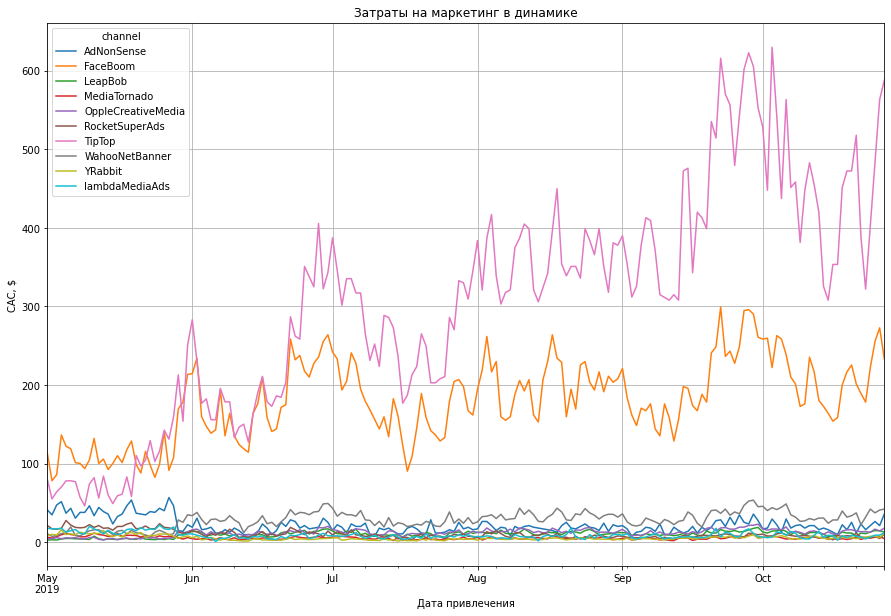

channel  AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
dt                                                                         
5           1169.70    3524.4   140.28        238.56              169.75   
6            538.65    5501.1   314.58        138.00              370.00   
7            504.00    5294.3   313.53        138.48              366.50   
8            579.60    6274.4   369.81        154.56              439.25   
9            581.70    6114.9   343.98        144.72              427.75   
10           537.60    5736.5   315.42        140.16              378.00   

channel  RocketSuperAds   TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
dt                                                                         
5               577.980   2981.0           418.8   299.70           458.4  
6               325.715   6675.6           921.0   106.20           199.2  
7               252.070   8410.2           851.4    97.38           219.2  
8               253.110  11202.0          1040.4   124.74           220.0  
9               218.400  13232.5           977.4   152.79           247.2  
10              205.725  12250.0           942.0   163.41           213.6

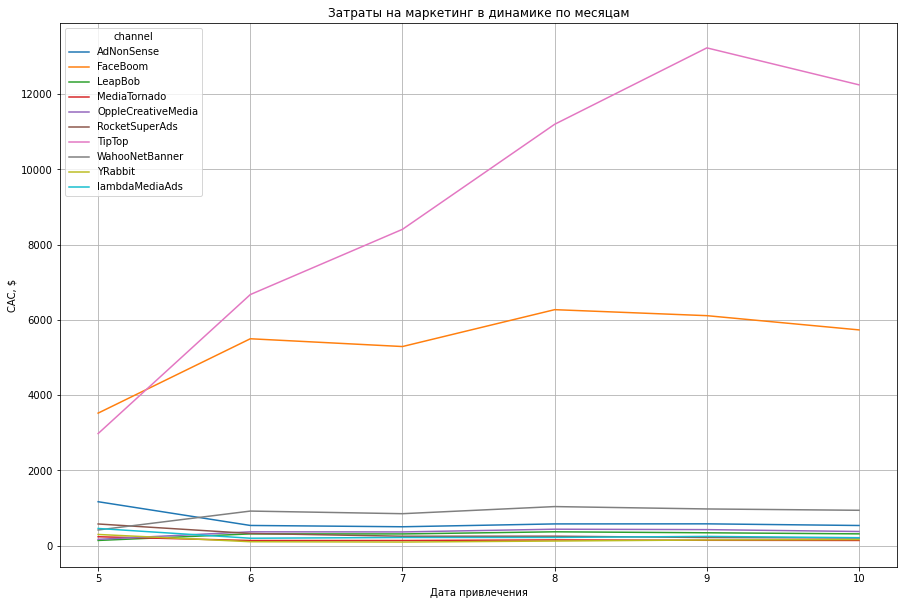

In [20]:
#Считаю общую сумму затрат на маркетинг:
total_cost = costs['costs'].sum().round(2)

display(total_cost)
#Считаю затраты на маркетинг по каждому источнику:
channel_costs = costs.groupby('channel')['costs'].sum().reset_index()
display(channel_costs)
data = channel_costs

fig = px.line(
    data, x='channel', y='costs', title='Траты на привлечение по источникам'
)
fig.show() 
#Считаю затраты на маркетинг по времени. По дням.
#costs_in_time = costs.groupby('dt')['costs'].sum().reset_index()
#display(costs_in_time)
channel_costs_in_time = costs.pivot_table(index = 'dt', columns = 'channel', values = 'costs', aggfunc = 'sum')
display(channel_costs_in_time)
report = channel_costs_in_time
report.plot(grid=True, figsize=(15, 10))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Затраты на маркетинг в динамике')
plt.show()
#Считаю затраты на маркетинг по времени. По месяцам.
costs['dt'] = pd.to_datetime(costs['dt']).dt.month
channel_costs_in_time = costs.pivot_table(index = 'dt', columns = 'channel', values = 'costs', aggfunc = 'sum')
display(channel_costs_in_time)
report = channel_costs_in_time
report.plot(grid=True, figsize=(15, 10))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Затраты на маркетинг в динамике по месяцам')
plt.show()



In [21]:
#Рассчитываю среднее значение САС на одного пользователя для всего проекта.
cac_per_user = profiles_analysis['acquisition_cost'].mean()
#Рассчитываю среднее значение САС на одного пользователя для каждого источника.
cac_channel = profiles_analysis.groupby('channel').agg({'acquisition_cost': 'mean'}).rename(columns={'acquisition_cost': 'cac'}).sort_values(by = 'cac', ascending = False)
                               
display(cac_per_user)
display(cac_channel)

0.6947534707615555

cac
channel                     
TipTop              2.757774
FaceBoom            1.113419
AdNonSense          1.008023
lambdaMediaAds      0.727237
WahooNetBanner      0.601856
RocketSuperAds      0.417431
OppleCreativeMedia  0.249908
MediaTornado        0.219035
YRabbit             0.217087
LeapBob             0.210000
organic             0.000000

ШАГ 4 Промежуточный вывод. 

Общие затраты на маркетинг составили 105497.30000000002$.
Наибольшие траты по каналу в целом у TipTop - 54751.30 и FaceBoom - 32445.6.
Наибольшее среднее значение САС на каждого пользователя по источнику у TipTop - 2.757774. Затем идут FaceBoom - 1.113419 и AdNonSense - 1.008023. Наименьшее значенея этой метрики у LeapBob - 0.210000. Близко к нему по значению метрики находятся YRabbit, MediaTornado и OppleCreativeMedia.

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей<a id="advertising"></a>

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

In [22]:
#Исключил канал organic внутри функции get_ltv()

result_raw, ltv, ltv_history, roi, roi_history  = get_ltv(
    
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)
#profiles = profiles.query('channel != "organic"')
display(ltv, ltv_history, roi, roi_history)

cohort_size      0.0       1.0       2.0      3.0       4.0  \
cohort                                                                   
All users        88644  0.34558  0.435754  0.504507  0.56109  0.611436   

                5.0      6.0       7.0       8.0       9.0      10.0     11.0  \
cohort                                                                          
All users  0.654368  0.69414  0.729778  0.764619  0.796665  0.826152  0.85207   

               12.0     13.0  
cohort                        
All users  0.878116  0.90203

cohort_size       0.0       1.0       2.0       3.0       4.0  \
dt                                                                          
2019-05-01          390  0.294282  0.383846  0.435026  0.514359  0.565538   
2019-05-02          323  0.324427  0.618235  0.664582  0.757276  0.803622   
2019-05-03          346  0.305751  0.452861  0.568237  0.669191  0.943468   
2019-05-04          457  0.471904  0.570175  0.624770  0.679365  0.876105   
2019-05-05          438  0.232443  0.394429  0.417215  0.462785  0.496963   
...                 ...       ...       ...       ...       ...       ...   
2019-10-15          442  0.372557  0.440294  0.496742  0.564502  0.609661   
2019-10-16          436  0.263257  0.297592  0.380000  0.437225  0.437225   
2019-10-17          449  0.369042  0.435724  0.613742  0.624855  0.635969   
2019-10-18          591  0.481320  0.540423  0.609662  0.660321  0.710981   
2019-10-19          588  0.341156  0.419235  0.504099  0.572007  0.597466   

                 5.0       6.0       7.0       8.0       9.0      10.0  \
dt                                                                       
2019-05-01  0.565538  0.578333  0.603923  0.680692  0.757538  0.808718   
2019-05-02  0.880898  0.911796  0.942693  1.004489  1.035387  1.081734   
2019-05-03  0.986734  1.001156  1.001156  1.073266  1.116532  1.130954   
2019-05-04  0.952538  0.974376  1.028972  1.061729  1.094486  1.127243   
2019-05-05  0.519749  0.553927  0.588105  0.599498  0.622283  0.667854   
...              ...       ...       ...       ...       ...       ...   
2019-10-15  0.632240  0.666109  0.688688  0.699977  0.722557  0.767715   
2019-10-16  0.471560  0.519633  0.531078  0.553968  0.565413  0.599748   
2019-10-17  0.658196  0.669310  0.702650  0.735991  0.791559  0.824900   
2019-10-18  0.778528  0.812301  0.837631  0.888291  0.922064  0.964281   
2019-10-19  0.648384  0.656871  0.690816  0.741735  0.767194  0.801156   

                11.0      12.0      13.0  
dt                                        
2019-05-01  0.872692  0.885487  0.898282  
2019-05-02  1.081734  1.112632  1.158978  
2019-05-03  1.203064  1.260751  1.304017  
2019-05-04  1.181838  1.181838  1.214595  
2019-05-05  0.679247  0.713425  0.713425  
...              ...       ...       ...  
2019-10-15  0.779005  0.790294  0.812873  
2019-10-16  0.599748  0.622638  0.645528  
2019-10-17  0.836013  0.869354  0.869354  
2019-10-18  1.014941  1.031827  1.040271  
2019-10-19  0.835102  0.886037  0.886037  

[172 rows x 15 columns]

cohort_size       cac       0.0       1.0       2.0       3.0  \
cohort                                                                     
All users        88644  1.117794  0.309163  0.389834  0.451341  0.501962   

                4.0      5.0       6.0       7.0       8.0       9.0  \
cohort                                                                 
All users  0.547002  0.58541  0.620991  0.652873  0.684043  0.712711   

               10.0      11.0      12.0      13.0  
cohort                                             
All users  0.739091  0.762278  0.785579  0.806974

cohort_size       cac       0.0       1.0       2.0       3.0  \
dt                                                                          
2019-05-01          390  0.781590  0.376517  0.491110  0.556591  0.658093   
2019-05-02          323  0.714690  0.453941  0.865039  0.929888  1.059585   
2019-05-03          346  0.760318  0.402136  0.595621  0.747368  0.880146   
2019-05-04          457  0.737418  0.639941  0.773205  0.847240  0.921276   
2019-05-05          438  0.730377  0.318251  0.540035  0.571232  0.633626   
...                 ...       ...       ...       ...       ...       ...   
2019-10-15          442  1.251708  0.297639  0.351755  0.396851  0.450986   
2019-10-16          436  1.345562  0.195648  0.221165  0.282410  0.324938   
2019-10-17          449  1.309532  0.281812  0.332732  0.468672  0.477159   
2019-10-18          591  1.294924  0.371697  0.417340  0.470809  0.509931   
2019-10-19          588  1.338104  0.254955  0.313305  0.376726  0.427476   

                 4.0       5.0       6.0       7.0       8.0       9.0  \
dt                                                                       
2019-05-01  0.723575  0.723575  0.739945  0.772686  0.870907  0.969228   
2019-05-02  1.124434  1.232559  1.275791  1.319024  1.405489  1.448721   
2019-05-03  1.240886  1.297791  1.316760  1.316760  1.411601  1.468506   
2019-05-04  1.188071  1.291721  1.321335  1.395371  1.439792  1.484214   
2019-05-05  0.680421  0.711618  0.758413  0.805208  0.820806  0.852003   
...              ...       ...       ...       ...       ...       ...   
2019-10-15  0.487063  0.505102  0.532160  0.550198  0.559218  0.577256   
2019-10-16  0.324938  0.350456  0.386183  0.394689  0.411700  0.420206   
2019-10-17  0.485646  0.502619  0.511106  0.536566  0.562026  0.604459   
2019-10-18  0.549053  0.601215  0.627296  0.646857  0.685979  0.712061   
2019-10-19  0.446502  0.484555  0.490897  0.516265  0.554318  0.573344   

                10.0      11.0      12.0      13.0  
dt                                                  
2019-05-01  1.034709  1.116561  1.132931  1.149301  
2019-05-02  1.513570  1.513570  1.556802  1.621651  
2019-05-03  1.487475  1.582316  1.658190  1.715095  
2019-05-04  1.528635  1.602671  1.602671  1.647092  
2019-05-05  0.914396  0.929995  0.976790  0.976790  
...              ...       ...       ...       ...  
2019-10-15  0.613334  0.622353  0.631373  0.649411  
2019-10-16  0.445723  0.445723  0.462734  0.479746  
2019-10-17  0.629919  0.638406  0.663866  0.663866  
2019-10-18  0.744662  0.783784  0.796825  0.803345  
2019-10-19  0.598725  0.624094  0.662159  0.662159  

[172 rows x 16 columns]

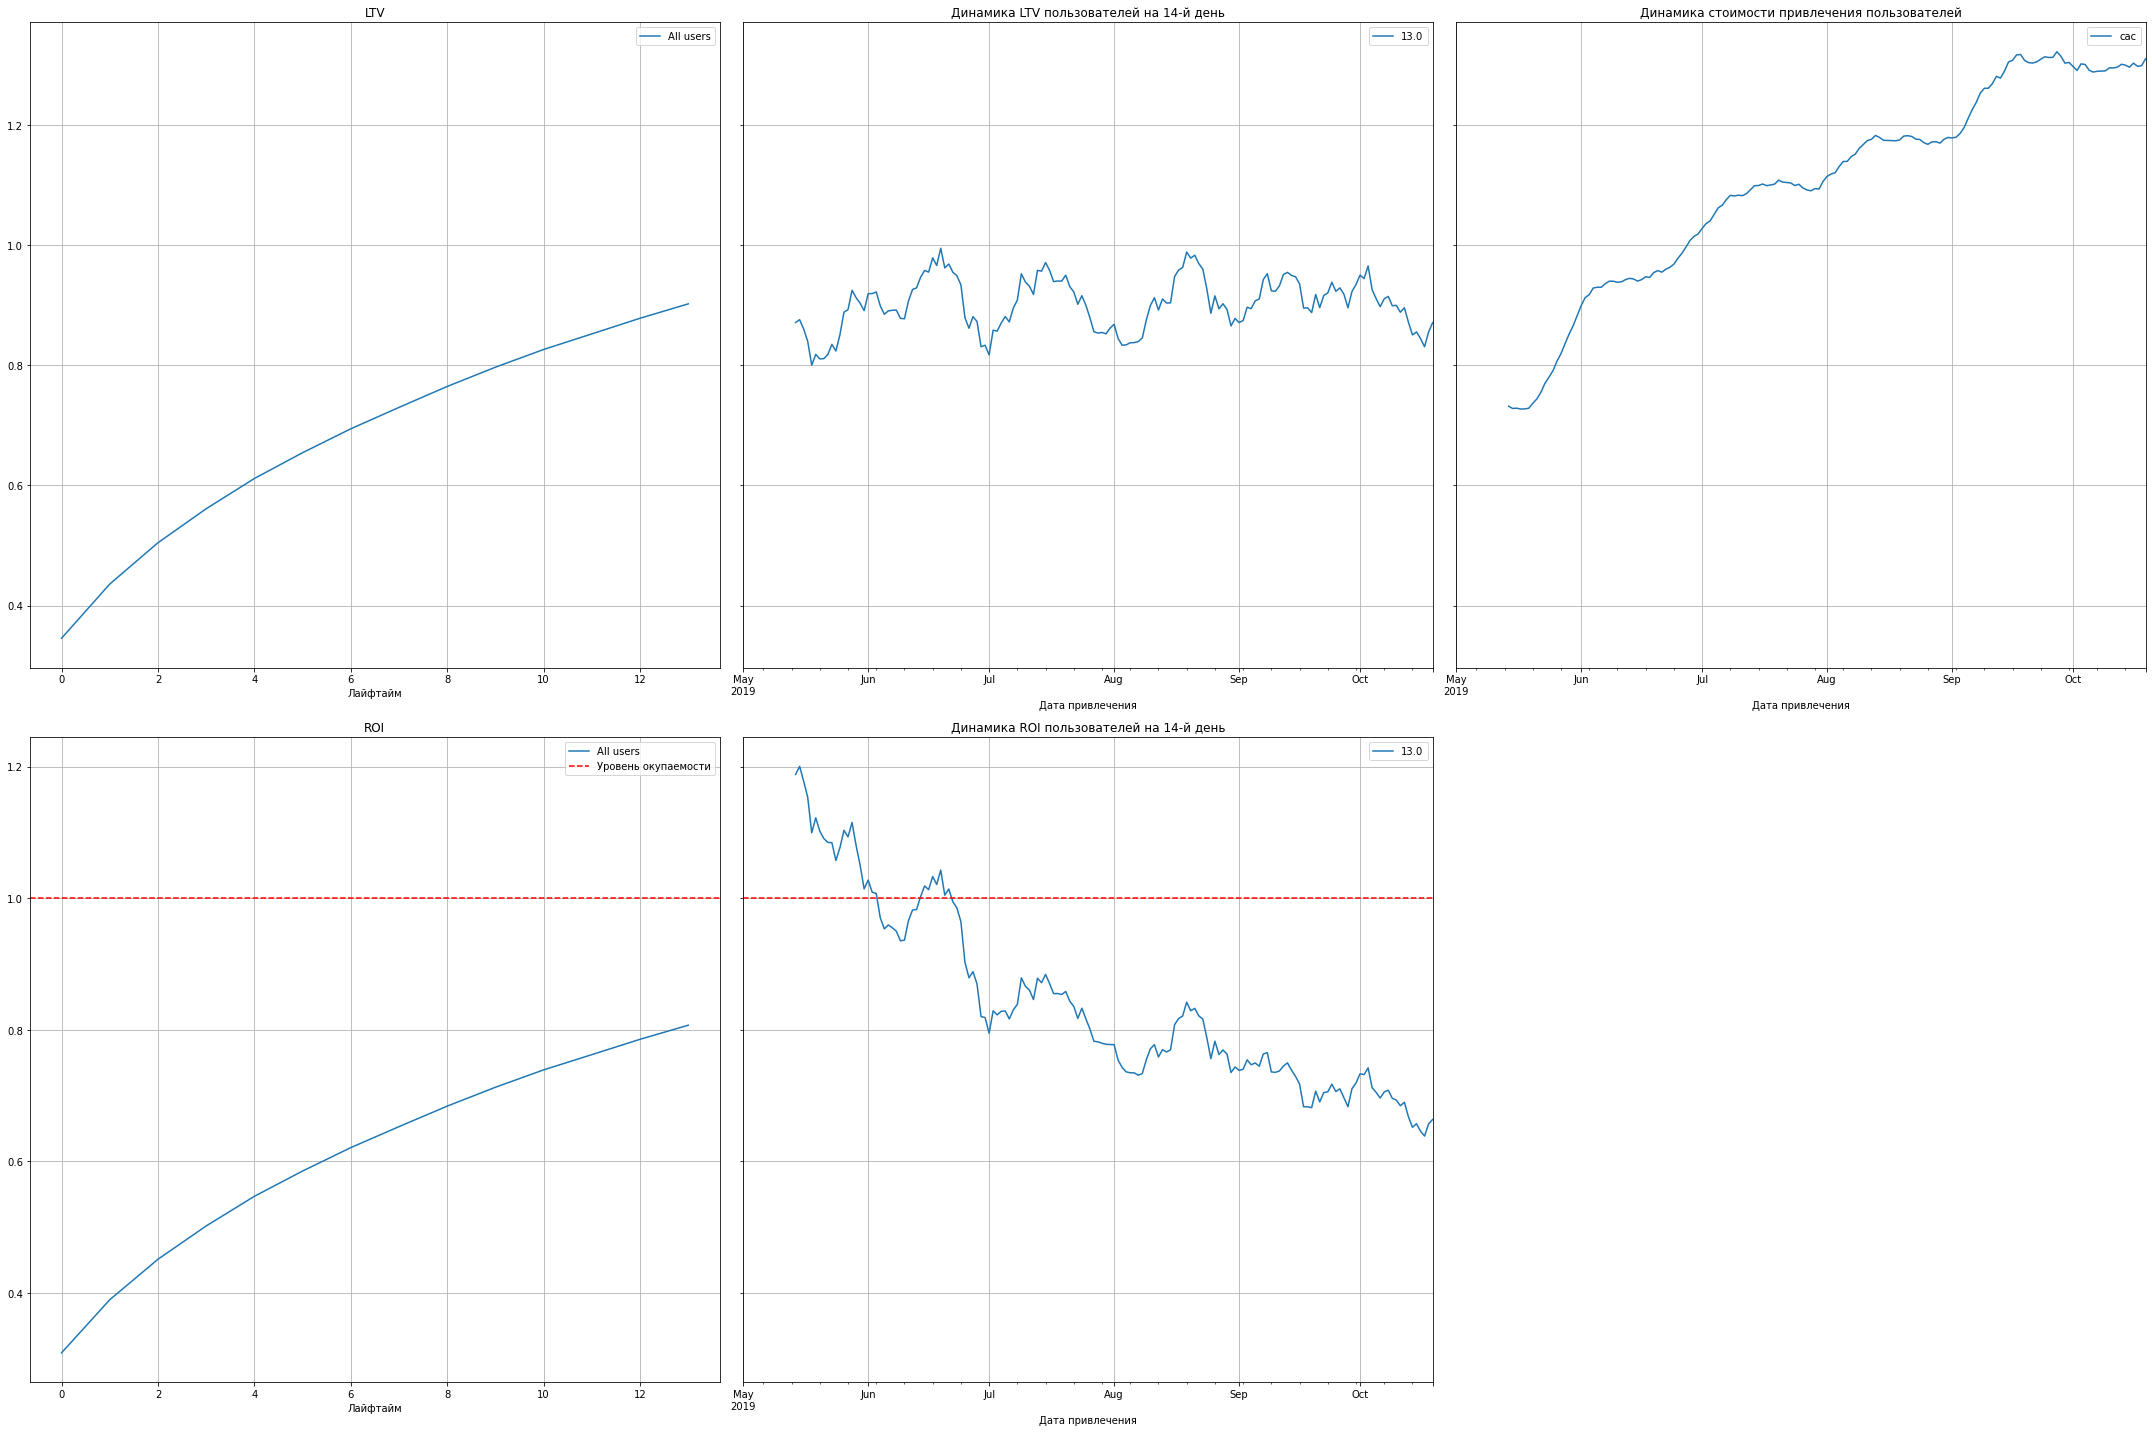

In [23]:
# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 

График LTV не отражает никаких проблем. Среднее значение динамики LTV принципиально не меняется пики вполне компенсируются аналогичными спадами. Значения CAC серьёзно растут до конца исследуемого периода. Можно допустить необоснованное увеличение рекламного бюджета. В результате можно видеть, что привлечение пользователей не окупилось за весь изучаемый период. Более, того график динамики ROI с мая по ноябрь довольно резко идёт вниз. 
ROI достигает чуть более 80% от затрат на привлечение.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

In [24]:
result_raw, ltv, ltv_history, roi, roi_history  = get_ltv(
    
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)
display(ltv, ltv_history, roi, roi_history)

cohort_size       0.0       1.0       2.0       3.0       4.0  \
device                                                                   
Android        20683  0.339218  0.430766  0.500209  0.555218  0.608159   
Mac            17747  0.382235  0.480219  0.550124  0.605077  0.651197   
PC             18128  0.277400  0.361536  0.430422  0.485652  0.539617   
iPhone         32086  0.367928  0.456307  0.523902  0.583165  0.632132   

              5.0       6.0       7.0       8.0       9.0      10.0      11.0  \
device                                                                          
Android  0.661395  0.699810  0.738562  0.773986  0.806850  0.833871  0.856068   
Mac      0.685782  0.721831  0.752874  0.790957  0.825376  0.857376  0.884370   
PC       0.581623  0.631240  0.661959  0.701004  0.729414  0.761510  0.788708   
iPhone   0.673563  0.710708  0.749656  0.779956  0.812214  0.840427  0.867426   

             12.0      13.0  
device                       
Android  0.887970  0.912098  
Mac      0.904617  0.930541  
PC       0.812106  0.836167  
iPhone   0.894400  0.916983

cohort_size       0.0       1.0       2.0       3.0  \
device  dt                                                                
Android 2019-05-01           95  0.367684  0.472737  0.525263  0.630316   
        2019-05-02           73  0.136712  1.026575  1.094932  1.094932   
        2019-05-03           89  0.224270  0.392472  0.560674  0.728876   
        2019-05-04          101  0.543465  0.691683  0.741089  0.790495   
        2019-05-05          103  0.193786  0.679126  0.679126  0.727573   
...                         ...       ...       ...       ...       ...   
iPhone  2019-10-15          168  0.267321  0.297024  0.297024  0.297024   
        2019-10-16          157  0.317898  0.349682  0.445032  0.476815   
        2019-10-17          155  0.515097  0.579484  0.643871  0.676065   
        2019-10-18          197  0.607919  0.683909  0.764975  0.866294   
        2019-10-19          238  0.419328  0.461261  0.545126  0.629034   

                         4.0       5.0       6.0       7.0       8.0  \
device  dt                                                             
Android 2019-05-01  0.682842  0.682842  0.682842  0.787895  0.945474   
        2019-05-02  1.094932  1.300137  1.300137  1.436849  1.436849   
        2019-05-03  0.841011  0.841011  0.841011  0.841011  0.953146   
        2019-05-04  0.938713  1.037525  1.086931  1.235149  1.284554   
        2019-05-05  0.727573  0.776019  0.776019  0.776019  0.776019   
...                      ...       ...       ...       ...       ...   
iPhone  2019-10-15  0.326726  0.326726  0.326726  0.326726  0.326726   
        2019-10-16  0.476815  0.540382  0.578535  0.578535  0.610318   
        2019-10-17  0.708258  0.740452  0.740452  0.740452  0.804839   
        2019-10-18  0.866294  0.967614  1.018274  1.068934  1.119594   
        2019-10-19  0.670966  0.712899  0.712899  0.775798  0.838697   

                         9.0      10.0      11.0      12.0      13.0  
device  dt                                                            
Android 2019-05-01  0.998000  0.998000  1.103053  1.155579  1.208105  
        2019-05-02  1.505205  1.573562  1.573562  1.573562  1.641918  
        2019-05-03  0.953146  1.009213  1.065281  1.121348  1.177416  
        2019-05-04  1.333960  1.383366  1.482178  1.482178  1.482178  
        2019-05-05  0.776019  0.824466  0.824466  0.872913  0.872913  
...                      ...       ...       ...       ...       ...  
iPhone  2019-10-15  0.326726  0.356429  0.356429  0.356429  0.356429  
        2019-10-16  0.642102  0.705669  0.705669  0.705669  0.737452  
        2019-10-17  0.901419  0.933613  0.933613  0.998000  0.998000  
        2019-10-18  1.144924  1.195584  1.246244  1.246244  1.271574  
        2019-10-19  0.880630  0.964538  0.985504  1.090378  1.090378  

[688 rows x 15 columns]

cohort_size       cac       0.0       1.0       2.0       3.0  \
device                                                                   
Android        20683  1.019759  0.332645  0.422419  0.490517  0.544460   
Mac            17747  1.276219  0.299506  0.376283  0.431058  0.474117   
PC             18128  0.792724  0.349933  0.456068  0.542966  0.612637   
iPhone         32086  1.277021  0.288114  0.357321  0.410253  0.456661   

              4.0       5.0       6.0       7.0       8.0       9.0      10.0  \
device                                                                          
Android  0.596376  0.648580  0.686250  0.724251  0.758989  0.791216  0.817714   
Mac      0.510255  0.537354  0.565601  0.589926  0.619766  0.646735  0.671809   
PC       0.680712  0.733701  0.796291  0.835044  0.884297  0.920135  0.960624   
iPhone   0.495005  0.527449  0.556536  0.587035  0.610762  0.636023  0.658115   

             11.0      12.0      13.0  
device                                 
Android  0.839481  0.870765  0.894425  
Mac      0.692961  0.708825  0.729139  
PC       0.994933  1.024449  1.054801  
iPhone   0.679258  0.700380  0.718064

cohort_size       cac       0.0       1.0       2.0  \
device  dt                                                                
Android 2019-05-01           95  0.750061  0.490206  0.630265  0.700294   
        2019-05-02           73  0.666357  0.205164  1.540578  1.643160   
        2019-05-03           89  0.780232  0.287440  0.503019  0.718599   
        2019-05-04          101  0.754812  0.720001  0.916365  0.981820   
        2019-05-05          103  0.689570  0.281025  0.984855  0.984855   
...                         ...       ...       ...       ...       ...   
iPhone  2019-10-15          168  1.404604  0.190318  0.211464  0.211464   
        2019-10-16          157  1.642934  0.193494  0.212840  0.270876   
        2019-10-17          155  1.479855  0.348072  0.391581  0.435091   
        2019-10-18          197  1.466506  0.414536  0.466353  0.521631   
        2019-10-19          238  1.523096  0.275313  0.302844  0.357907   

                         3.0       4.0       5.0       6.0       7.0  \
device  dt                                                             
Android 2019-05-01  0.840353  0.910382  0.910382  0.910382  1.050441   
        2019-05-02  1.643160  1.643160  1.951111  1.951111  2.156275   
        2019-05-03  0.934178  1.077898  1.077898  1.077898  1.077898   
        2019-05-04  1.047274  1.243638  1.374548  1.440002  1.636366   
        2019-05-05  1.055111  1.055111  1.125367  1.125367  1.125367   
...                      ...       ...       ...       ...       ...   
iPhone  2019-10-15  0.211464  0.232611  0.232611  0.232611  0.232611   
        2019-10-16  0.290222  0.290222  0.328913  0.352135  0.352135   
        2019-10-17  0.456845  0.478600  0.500354  0.500354  0.500354   
        2019-10-18  0.590720  0.590720  0.659809  0.694354  0.728899   
        2019-10-19  0.412997  0.440528  0.468059  0.468059  0.509356   

                         8.0       9.0      10.0      11.0      12.0      13.0  
device  dt                                                                      
Android 2019-05-01  1.260529  1.330559  1.330559  1.470617  1.540647  1.610676  
        2019-05-02  2.156275  2.258857  2.361439  2.361439  2.361439  2.464020  
        2019-05-03  1.221618  1.221618  1.293478  1.365338  1.437198  1.509058  
        2019-05-04  1.701821  1.767275  1.832730  1.963639  1.963639  1.963639  
        2019-05-05  1.125367  1.125367  1.195623  1.195623  1.265880  1.265880  
...                      ...       ...       ...       ...       ...       ...  
iPhone  2019-10-15  0.232611  0.232611  0.253757  0.253757  0.253757  0.253757  
        2019-10-16  0.371481  0.390826  0.429517  0.429517  0.429517  0.448863  
        2019-10-17  0.543863  0.609127  0.630881  0.630881  0.674390  0.674390  
        2019-10-18  0.763443  0.780716  0.815260  0.849805  0.849805  0.867077  
        2019-10-19  0.550653  0.578184  0.633275  0.647040  0.715896  0.715896  

[688 rows x 16 columns]

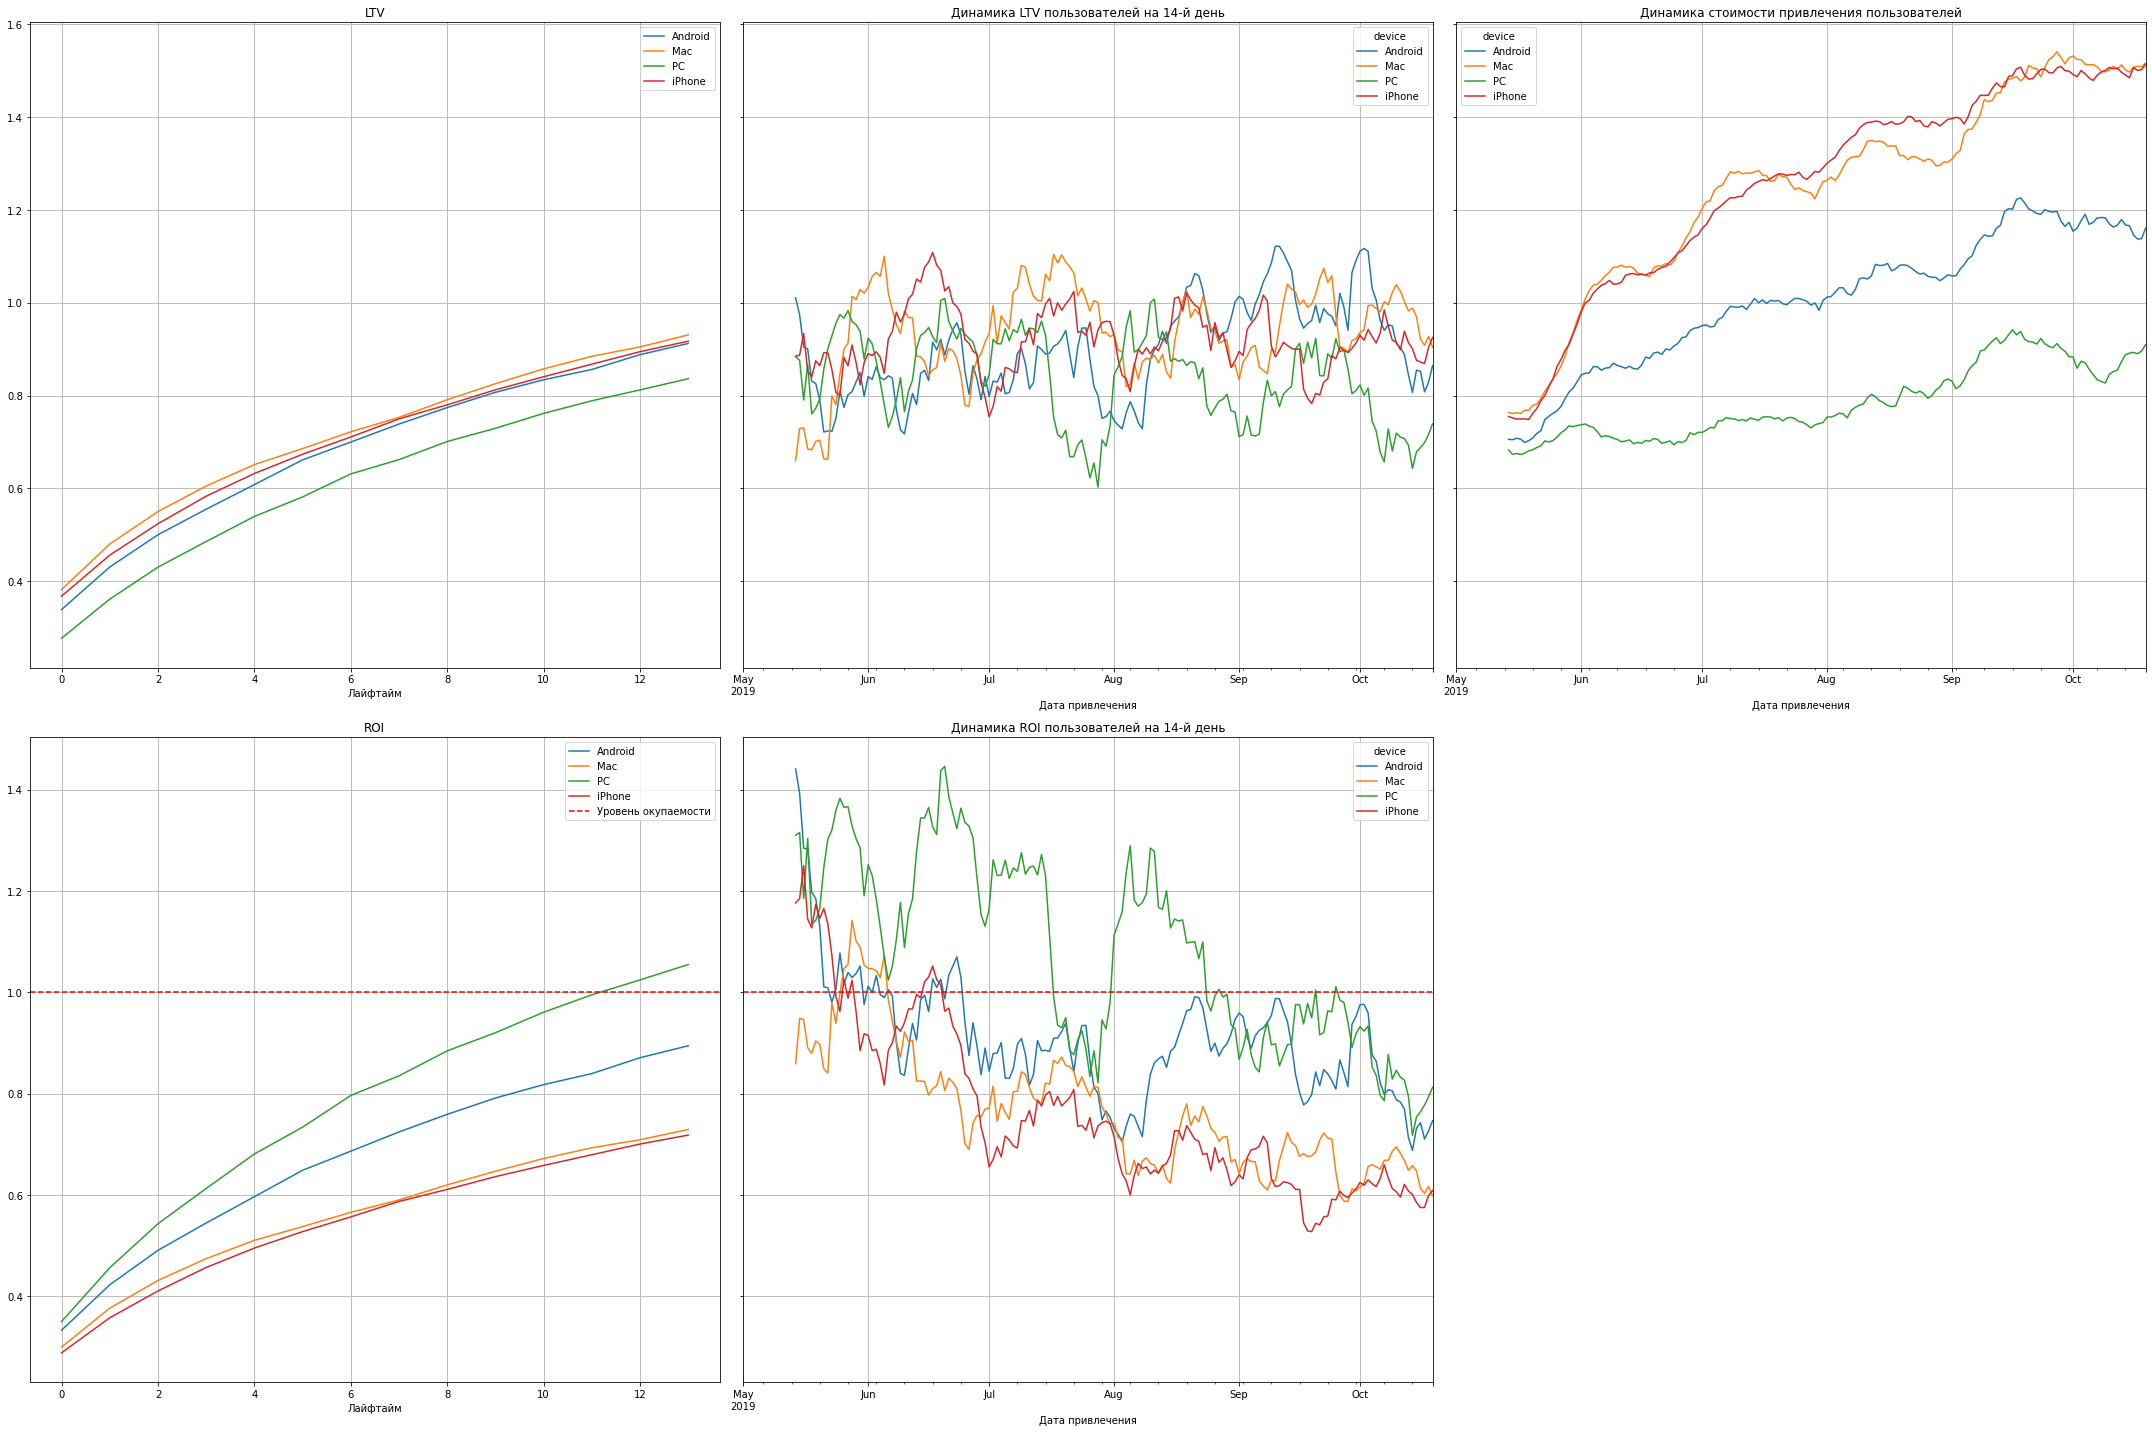

In [25]:
# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Разбивка по устройствам даёт почти ту же картину для всех устройств. Стоимость привлечения наиболее сильно растёт для владельцев техники Apple (Mac и iPhone) - именно их привлечение и не окупается. Так же достаточно заметно растёт стоимость привлечения владельцев устройств на Android.  Динамика ROI падает для этих групп пользователей быстрее. С сентября для всех устройств на 14 день жизни ROI отрицательный. В среднем к последнему лайфтайму ROI не намного выше окупаемости только у владельцев PC. Остальные не окупаются вовсе. Хуже всего ситуация с владельцами устройств Mac и iPhone.

### Проанализируйте окупаемость рекламы с разбивкой по странам

In [26]:
result_raw, ltv, ltv_history, roi, roi_history  = get_ltv(
    
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)
display(ltv, ltv_history, roi, roi_history)

cohort_size       0.0       1.0       2.0       3.0       4.0  \
region                                                                         
France               10516  0.193428  0.259783  0.311696  0.360199  0.406892   
Germany               9030  0.186350  0.258858  0.327945  0.375473  0.422776   
UK                   10536  0.218683  0.296762  0.367626  0.416607  0.465505   
United States        58562  0.420285  0.519636  0.590981  0.651779  0.703511   

                    5.0       6.0       7.0       8.0       9.0      10.0  \
region                                                                      
France         0.450173  0.481019  0.507213  0.541484  0.570906  0.600042   
Germany        0.460907  0.496938  0.534074  0.571104  0.605367  0.641507   
UK             0.503964  0.556090  0.585644  0.623741  0.645527  0.668830   
United States  0.747926  0.787655  0.825852  0.859873  0.893893  0.923530   

                   11.0      12.0      13.0  
region                                       
France         0.621870  0.649871  0.670278  
Germany        0.665932  0.691355  0.713019  
UK             0.692322  0.719800  0.743481  
United States  0.950849  0.976382  1.001316

cohort_size       0.0       1.0       2.0       3.0  \
region        dt                                                                
France        2019-05-01           52  0.095962  0.095962  0.095962  0.095962   
              2019-05-02           27  0.184815  0.184815  0.184815  0.369630   
              2019-05-03           45  0.443556  0.554444  0.665333  0.665333   
              2019-05-04           38  0.262632  0.393947  0.525263  0.656579   
              2019-05-05           44  0.226818  0.226818  0.226818  0.226818   
...                               ...       ...       ...       ...       ...   
United States 2019-10-15          286  0.436189  0.505979  0.540874  0.593217   
              2019-10-16          290  0.344172  0.378586  0.485276  0.536897   
              2019-10-17          313  0.497508  0.577220  0.672875  0.688818   
              2019-10-18          375  0.585573  0.652107  0.731947  0.731947   
              2019-10-19          396  0.443561  0.534293  0.622500  0.723333   

                               4.0       5.0       6.0       7.0       8.0  \
region        dt                                                             
France        2019-05-01  0.095962  0.095962  0.095962  0.095962  0.095962   
              2019-05-02  0.369630  0.739259  0.739259  0.739259  0.739259   
              2019-05-03  0.887111  0.887111  0.887111  0.887111  0.998000   
              2019-05-04  0.656579  0.787895  0.787895  0.787895  0.919211   
              2019-05-05  0.226818  0.226818  0.226818  0.340227  0.340227   
...                            ...       ...       ...       ...       ...   
United States 2019-10-15  0.628112  0.645559  0.680455  0.715350  0.715350   
              2019-10-16  0.536897  0.588517  0.660793  0.678000  0.712414   
              2019-10-17  0.704760  0.720703  0.736645  0.784473  0.832300   
              2019-10-18  0.785173  0.851707  0.878320  0.878320  0.918240   
              2019-10-19  0.748535  0.811540  0.811540  0.849343  0.887146   

                               9.0      10.0      11.0      12.0      13.0  
region        dt                                                            
France        2019-05-01  0.095962  0.095962  0.095962  0.095962  0.095962  
              2019-05-02  0.739259  0.924074  0.924074  1.108889  1.108889  
              2019-05-03  0.998000  0.998000  0.998000  0.998000  0.998000  
              2019-05-04  0.919211  0.919211  0.919211  0.919211  0.919211  
              2019-05-05  0.340227  0.453636  0.453636  0.453636  0.453636  
...                            ...       ...       ...       ...       ...  
United States 2019-10-15  0.732797  0.732797  0.750245  0.767692  0.767692  
              2019-10-16  0.729621  0.781241  0.781241  0.815655  0.850069  
              2019-10-17  0.896070  0.927955  0.943898  0.991725  0.991725  
              2019-10-18  0.958160  0.998080  1.038000  1.051307  1.051307  
              2019-10-19  0.924949  0.962778  1.000581  1.038409  1.038409  

[688 rows x 15 columns]

cohort_size       cac       0.0       1.0       2.0       3.0  \
region                                                                         
France               10516  0.459836  0.420645  0.564947  0.677842  0.783319   
Germany               9030  0.464898  0.400840  0.556806  0.705411  0.807645   
UK                   10536  0.454922  0.480704  0.652335  0.808109  0.915777   
United States        58562  1.455876  0.288682  0.356923  0.405928  0.447689   

                    4.0       5.0       6.0       7.0       8.0       9.0  \
region                                                                      
France         0.884863  0.978985  1.046066  1.103029  1.177559  1.241542   
Germany        0.909395  0.991414  1.068917  1.148797  1.228449  1.302148   
UK             1.023264  1.107802  1.222385  1.287350  1.371094  1.418984   
United States  0.483222  0.513729  0.541018  0.567254  0.590622  0.613990   

                   10.0      11.0      12.0      13.0  
region                                                 
France         1.304903  1.352373  1.413265  1.457644  
Germany        1.379887  1.432426  1.487111  1.533709  
UK             1.470208  1.521847  1.582249  1.634306  
United States  0.634347  0.653111  0.670649  0.687776

cohort_size       cac       0.0       1.0       2.0  \
region        dt                                                                
France        2019-05-01           52  0.660034  0.145389  0.145389  0.145389   
              2019-05-02           27  0.582389  0.317339  0.317339  0.317339   
              2019-05-03           45  0.672661  0.659404  0.824255  0.989106   
              2019-05-04           38  0.672742  0.390390  0.585585  0.780780   
              2019-05-05           44  0.558166  0.406363  0.406363  0.406363   
...                               ...       ...       ...       ...       ...   
United States 2019-10-15          286  1.694283  0.257447  0.298639  0.319235   
              2019-10-16          290  1.792569  0.192000  0.211198  0.270715   
              2019-10-17          313  1.692173  0.294005  0.341112  0.397640   
              2019-10-18          375  1.783573  0.328315  0.365618  0.410382   
              2019-10-19          396  1.783725  0.248671  0.299538  0.348989   

                               3.0       4.0       5.0       6.0       7.0  \
region        dt                                                             
France        2019-05-01  0.145389  0.145389  0.145389  0.145389  0.145389   
              2019-05-02  0.634678  0.634678  1.269356  1.269356  1.269356   
              2019-05-03  0.989106  1.318809  1.318809  1.318809  1.318809   
              2019-05-04  0.975975  0.975975  1.171170  1.171170  1.171170   
              2019-05-05  0.406363  0.406363  0.406363  0.406363  0.609545   
...                            ...       ...       ...       ...       ...   
United States 2019-10-15  0.350128  0.370724  0.381022  0.401618  0.422214   
              2019-10-16  0.299512  0.299512  0.328309  0.368629  0.378228   
              2019-10-17  0.407061  0.416483  0.425904  0.435325  0.463589   
              2019-10-18  0.410382  0.440225  0.477528  0.492450  0.492450   
              2019-10-19  0.405518  0.419647  0.454970  0.454970  0.476163   

                               8.0       9.0      10.0      11.0      12.0  \
region        dt                                                             
France        2019-05-01  0.145389  0.145389  0.145389  0.145389  0.145389   
              2019-05-02  1.269356  1.269356  1.586695  1.586695  1.904034   
              2019-05-03  1.483660  1.483660  1.483660  1.483660  1.483660   
              2019-05-04  1.366365  1.366365  1.366365  1.366365  1.366365   
              2019-05-05  0.609545  0.609545  0.812726  0.812726  0.812726   
...                            ...       ...       ...       ...       ...   
United States 2019-10-15  0.422214  0.432512  0.432512  0.442810  0.453107   
              2019-10-16  0.397426  0.407025  0.435822  0.435822  0.455020   
              2019-10-17  0.491853  0.529538  0.548381  0.557802  0.586066   
              2019-10-18  0.514832  0.537214  0.559596  0.581978  0.589438   
              2019-10-19  0.497356  0.518549  0.539757  0.560950  0.582158   

                              13.0  
region        dt                    
France        2019-05-01  0.145389  
              2019-05-02  1.904034  
              2019-05-03  1.483660  
              2019-05-04  1.366365  
              2019-05-05  0.812726  
...                            ...  
United States 2019-10-15  0.453107  
              2019-10-16  0.474218  
              2019-10-17  0.586066  
              2019-10-18  0.589438  
              2019-10-19  0.582158  

[688 rows x 16 columns]

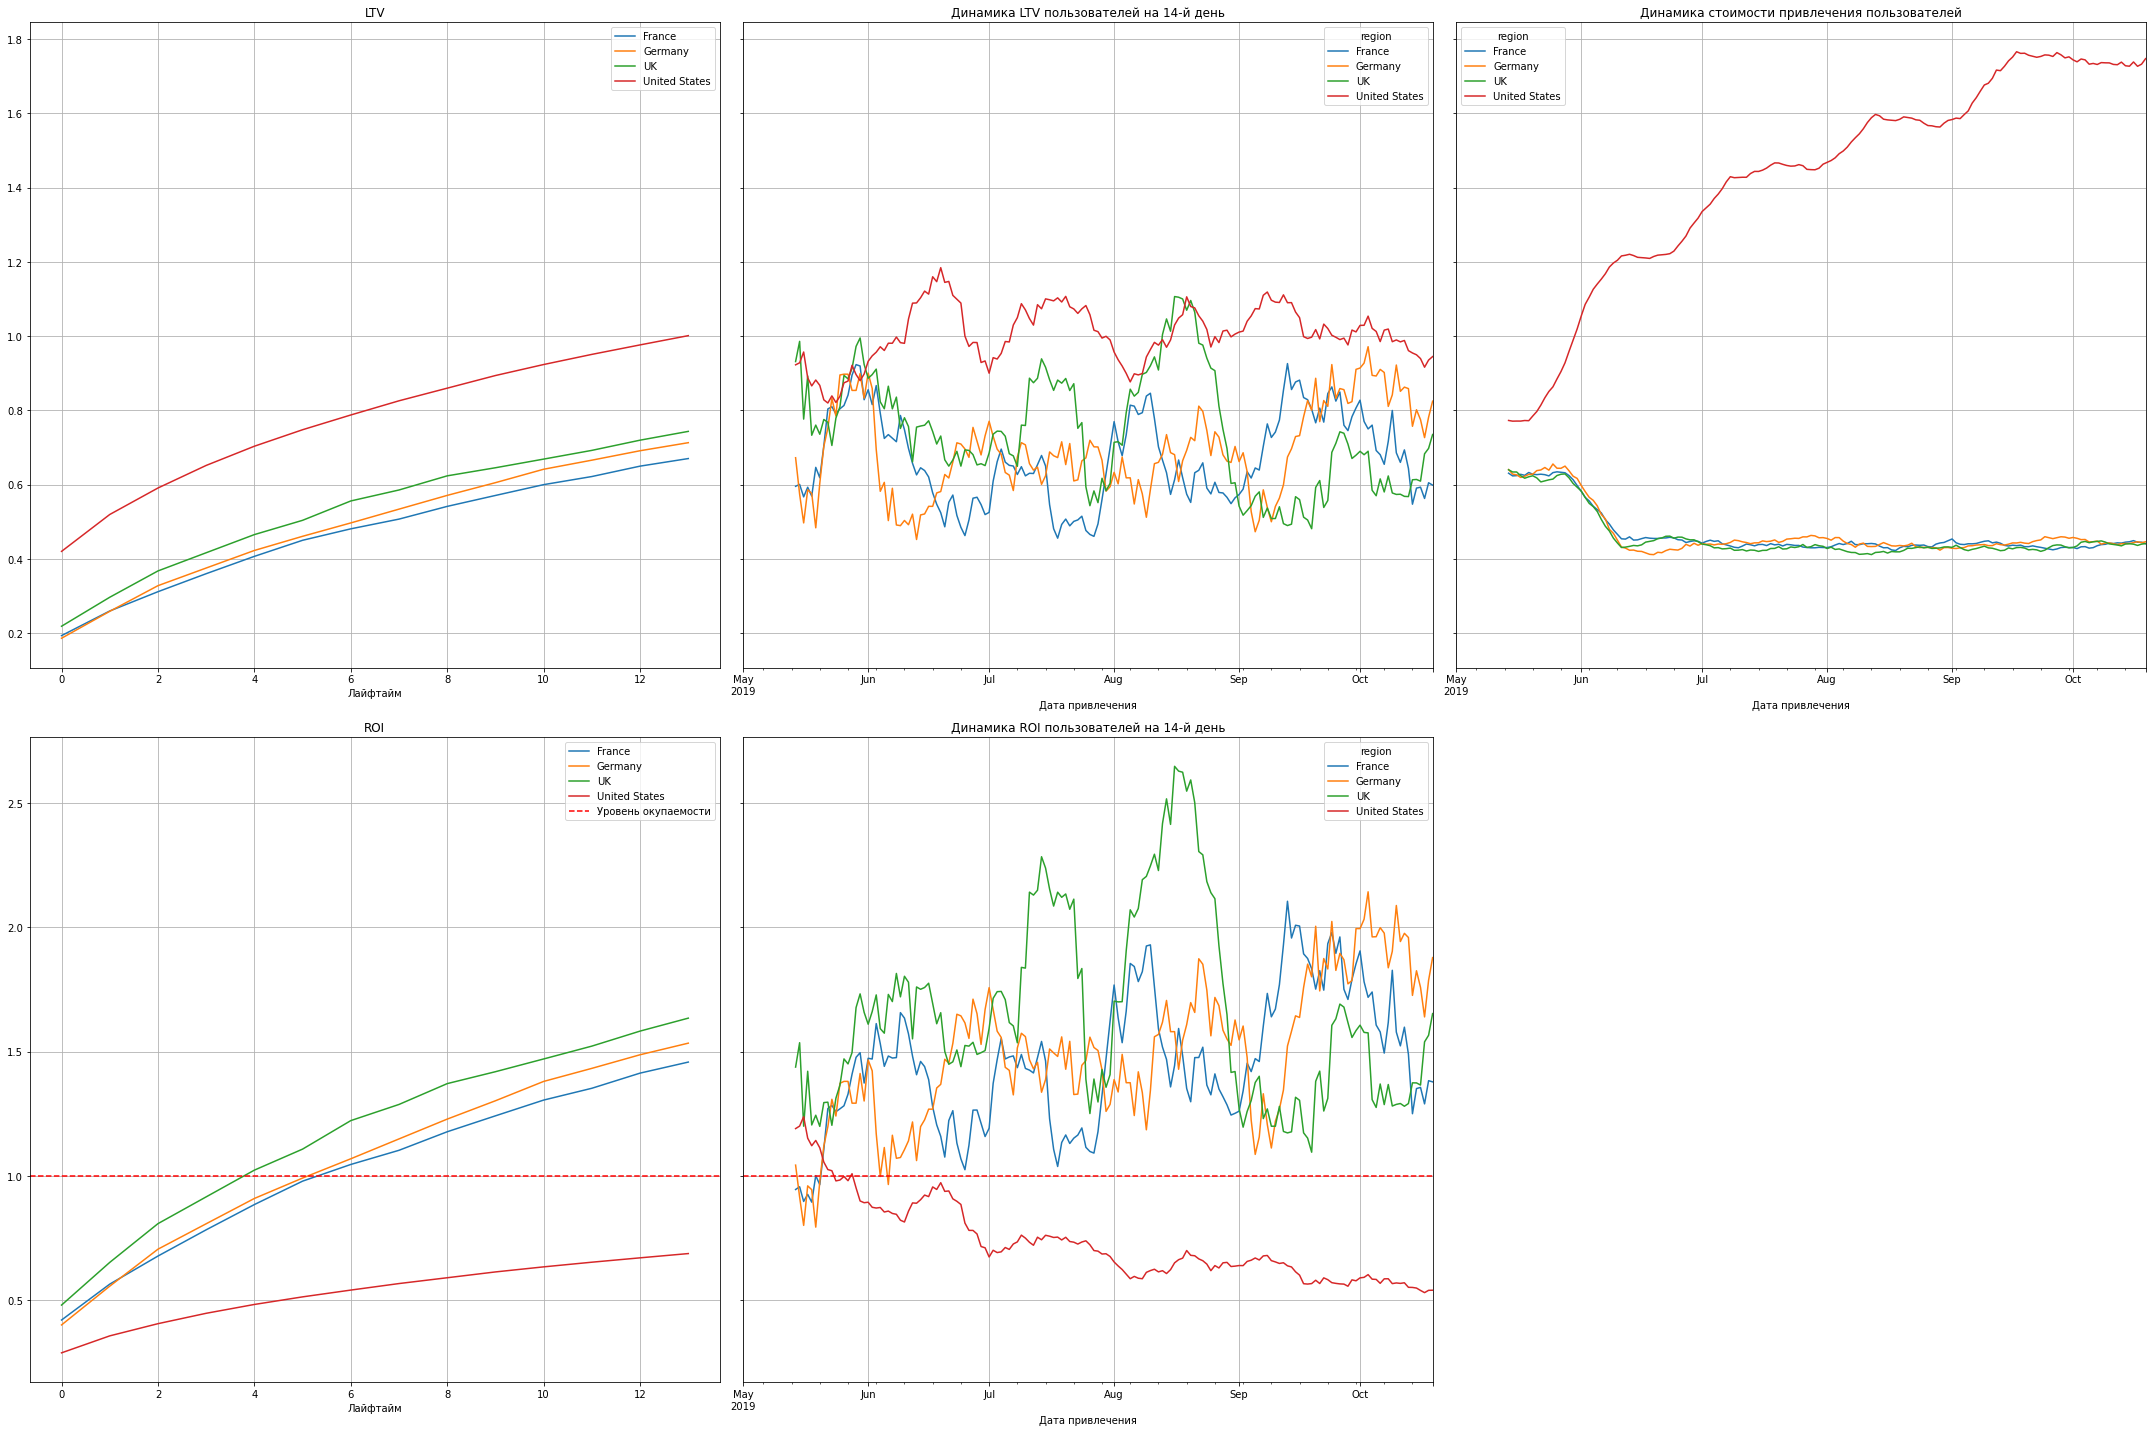

In [27]:
# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Стоимость привлечение клиентов в США резко возрастает. В остальных странах более или менее стабильна в течение всего периода времени и в основном совпадает у всех трёх стран. Приэтом привлечение пользователей из Франции, Великобритании и Германии окупается в два или почти в два раза, тогда как окупаемость для США за весь изучаемый период не достигнута. Ситуация тем более странная, что подавляющее большинство платящих пользователей приходит именно из США - 77.8%. Возможно, это связано с слишком высокими расходами на привлечение.
Динамика окупаемости для трёх европейских стран колеблется по общей закономерности с некоторым лагом и остаётся заметно выше нулевой окупаемости. Тот же показатель для США, будучи достаточно высоким на старте, к концу периода опускается заметно ниже нуля. Наиболее высокие темпы падения приходятся на май - начало июня, в то время, как в остальных странах наблюдается первый пик.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

In [28]:
result_raw, ltv, ltv_history, roi, roi_history  = get_ltv(
    
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)
display(ltv, ltv_history, roi, roi_history)

cohort_size       0.0       1.0       2.0       3.0  \
channel                                                                   
AdNonSense                 3702  0.505030  0.589149  0.644417  0.683509   
FaceBoom                  27544  0.585703  0.660825  0.700722  0.728842   
LeapBob                    8103  0.107048  0.155702  0.205583  0.235391   
MediaTornado               4167  0.137485  0.191615  0.246943  0.293667   
OppleCreativeMedia         8139  0.097239  0.131578  0.171686  0.206636   
RocketSuperAds             4251  0.207570  0.318640  0.396114  0.455980   
TipTop                    18498  0.343550  0.497389  0.624141  0.739834   
WahooNetBanner             8082  0.191302  0.291477  0.378921  0.443754   
YRabbit                    4102  0.163301  0.213423  0.256000  0.303932   
lambdaMediaAds             2056  0.460268  0.645302  0.778789  0.905540   

                         4.0       5.0       6.0       7.0       8.0  \
channel                                                                
AdNonSense          0.706694  0.732582  0.754149  0.767628  0.789203   
FaceBoom            0.747143  0.760369  0.774718  0.784757  0.792404   
LeapBob             0.259654  0.288599  0.314587  0.333802  0.369543   
MediaTornado        0.332249  0.366979  0.388534  0.418474  0.440034   
OppleCreativeMedia  0.241103  0.266240  0.290152  0.309527  0.328544   
RocketSuperAds      0.515613  0.571019  0.639125  0.687255  0.737986   
TipTop              0.842358  0.935707  1.013676  1.096450  1.171400   
WahooNetBanner      0.516862  0.569469  0.631870  0.678176  0.725353   
YRabbit             0.356265  0.387894  0.414656  0.438988  0.460885   
lambdaMediaAds      1.041503  1.160433  1.262369  1.352169  1.444888   

                         9.0      10.0      11.0      12.0      13.0  
channel                                                               
AdNonSense          0.802682  0.806996  0.815084  0.827215  0.838006  
FaceBoom            0.800775  0.806247  0.812226  0.817483  0.821469  
LeapBob             0.394176  0.417579  0.437902  0.457608  0.473004  
MediaTornado        0.461589  0.485541  0.508294  0.526256  0.533684  
OppleCreativeMedia  0.346938  0.364228  0.376613  0.395017  0.409118  
RocketSuperAds      0.790118  0.831437  0.864307  0.898586  0.933801  
TipTop              1.245485  1.311417  1.371467  1.427640  1.487908  
WahooNetBanner      0.765488  0.812535  0.849334  0.889472  0.918615  
YRabbit             0.480349  0.502245  0.524147  0.546287  0.559668  
lambdaMediaAds      1.505564  1.579348  1.630316  1.695861  1.766250

cohort_size       0.0       1.0       2.0  \
channel        dt                                                      
AdNonSense     2019-05-01           39  0.255897  0.383846  0.383846   
               2019-05-02           36  0.000000  0.000000  0.000000   
               2019-05-03           45  0.221778  0.465778  0.465778   
               2019-05-04           51  0.489216  0.587059  0.587059   
               2019-05-05           36  0.859444  0.859444  0.859444   
...                                ...       ...       ...       ...   
lambdaMediaAds 2019-10-15           12  0.415833  0.831667  1.247500   
               2019-10-16           11  0.453636  0.453636  0.453636   
               2019-10-17            3  0.000000  0.000000  0.000000   
               2019-10-18           11  0.907273  0.907273  0.907273   
               2019-10-19            7  0.000000  0.000000  0.000000   

                                3.0       4.0       5.0       6.0       7.0  \
channel        dt                                                             
AdNonSense     2019-05-01  0.383846  0.511795  0.511795  0.511795  0.511795   
               2019-05-02  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-05-03  0.465778  0.465778  0.465778  0.465778  0.465778   
               2019-05-04  0.587059  0.587059  0.587059  0.587059  0.587059   
               2019-05-05  0.859444  0.859444  0.859444  0.859444  0.859444   
...                             ...       ...       ...       ...       ...   
lambdaMediaAds 2019-10-15  1.663333  2.079167  2.079167  2.495000  2.495000   
               2019-10-16  0.907273  0.907273  0.907273  0.907273  0.907273   
               2019-10-17  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-10-18  1.814545  1.814545  1.814545  1.814545  2.268182   
               2019-10-19  0.000000  0.000000  0.000000  0.000000  0.000000   

                                8.0       9.0      10.0      11.0      12.0  \
channel        dt                                                             
AdNonSense     2019-05-01  0.511795  0.511795  0.511795  0.511795  0.511795   
               2019-05-02  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-05-03  0.465778  0.465778  0.465778  0.576667  0.576667   
               2019-05-04  0.587059  0.587059  0.587059  0.587059  0.587059   
               2019-05-05  0.859444  0.859444  0.859444  0.859444  0.998056   
...                             ...       ...       ...       ...       ...   
lambdaMediaAds 2019-10-15  2.495000  2.495000  2.910833  2.910833  2.910833   
               2019-10-16  0.907273  0.907273  0.907273  0.907273  0.907273   
               2019-10-17  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-10-18  2.721818  2.721818  3.175455  3.629091  3.629091   
               2019-10-19  0.000000  0.000000  0.000000  0.000000  0.000000   

                               13.0  
channel        dt                    
AdNonSense     2019-05-01  0.511795  
               2019-05-02  0.000000  
               2019-05-03  0.576667  
               2019-05-04  0.587059  
               2019-05-05  0.998056  
...                             ...  
lambdaMediaAds 2019-10-15  3.742500  
               2019-10-16  0.907273  
               2019-10-17  0.000000  
               2019-10-18  4.082727  
               2019-10-19  0.000000  

[1720 rows x 15 columns]

cohort_size       cac       0.0       1.0       2.0  \
channel                                                                   
AdNonSense                 3702  1.008023  0.501010  0.584460  0.639288   
FaceBoom                  27544  1.113419  0.526040  0.593510  0.629343   
LeapBob                    8103  0.210000  0.509752  0.741436  0.978967   
MediaTornado               4167  0.219035  0.627684  0.874814  1.127410   
OppleCreativeMedia         8139  0.249908  0.389100  0.526504  0.686996   
RocketSuperAds             4251  0.417431  0.497256  0.763336  0.948932   
TipTop                    18498  2.757774  0.124575  0.180359  0.226321   
WahooNetBanner             8082  0.601856  0.317853  0.484298  0.629588   
YRabbit                    4102  0.217087  0.752238  0.983122  1.179250   
lambdaMediaAds             2056  0.727237  0.632899  0.887333  1.070887   

                         3.0       4.0       5.0       6.0       7.0  \
channel                                                                
AdNonSense          0.678069  0.701069  0.726752  0.748147  0.761519   
FaceBoom            0.654599  0.671035  0.682914  0.695801  0.704818   
LeapBob             1.120908  1.236450  1.374282  1.498034  1.589535   
MediaTornado        1.340729  1.516873  1.675432  1.773841  1.910531   
OppleCreativeMedia  0.826849  0.964769  1.065354  1.161037  1.238564   
RocketSuperAds      1.092347  1.235204  1.367935  1.531090  1.646391   
TipTop              0.268272  0.305449  0.339298  0.367570  0.397585   
WahooNetBanner      0.737309  0.858780  0.946188  1.049868  1.126808   
YRabbit             1.400049  1.641119  1.786814  1.910094  2.022179   
lambdaMediaAds      1.245178  1.432136  1.595673  1.735841  1.859323   

                         8.0       9.0      10.0      11.0      12.0      13.0  
channel                                                                         
AdNonSense          0.782922  0.796294  0.800573  0.808597  0.820631  0.831337  
FaceBoom            0.711685  0.719204  0.724119  0.729488  0.734210  0.737790  
LeapBob             1.759730  1.877030  1.988470  2.085248  2.179087  2.252399  
MediaTornado        2.008962  2.107371  2.216726  2.320602  2.402610  2.436519  
OppleCreativeMedia  1.314661  1.388265  1.457448  1.507006  1.580649  1.637075  
RocketSuperAds      1.767923  1.892809  1.991795  2.070538  2.152657  2.237019  
TipTop              0.424763  0.451627  0.475535  0.497310  0.517679  0.539532  
WahooNetBanner      1.205193  1.271878  1.350049  1.411192  1.477881  1.526304  
YRabbit             2.123045  2.212703  2.313569  2.414457  2.516446  2.578086  
lambdaMediaAds      1.986818  2.070251  2.171709  2.241794  2.331922  2.428712

cohort_size       cac       0.0       1.0  \
channel        dt                                                      
AdNonSense     2019-05-01           39  1.050000  0.243712  0.365568   
               2019-05-02           36  0.962500  0.000000  0.000000   
               2019-05-03           45  1.050000  0.211217  0.443598   
               2019-05-04           51  1.008824  0.484937  0.581924   
               2019-05-05           36  1.020833  0.841905  0.841905   
...                                ...       ...       ...       ...   
lambdaMediaAds 2019-10-15           12  0.733333  0.567045  1.134091   
               2019-10-16           11  0.727273  0.623750  0.623750   
               2019-10-17            3  0.800000  0.000000  0.000000   
               2019-10-18           11  0.727273  1.247500  1.247500   
               2019-10-19            7  0.800000  0.000000  0.000000   

                                2.0       3.0       4.0       5.0       6.0  \
channel        dt                                                             
AdNonSense     2019-05-01  0.365568  0.365568  0.487424  0.487424  0.487424   
               2019-05-02  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-05-03  0.443598  0.443598  0.443598  0.443598  0.443598   
               2019-05-04  0.581924  0.581924  0.581924  0.581924  0.581924   
               2019-05-05  0.841905  0.841905  0.841905  0.841905  0.841905   
...                             ...       ...       ...       ...       ...   
lambdaMediaAds 2019-10-15  1.701136  2.268182  2.835227  2.835227  3.402273   
               2019-10-16  0.623750  1.247500  1.247500  1.247500  1.247500   
               2019-10-17  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-10-18  1.247500  2.495000  2.495000  2.495000  2.495000   
               2019-10-19  0.000000  0.000000  0.000000  0.000000  0.000000   

                                7.0       8.0       9.0      10.0      11.0  \
channel        dt                                                             
AdNonSense     2019-05-01  0.487424  0.487424  0.487424  0.487424  0.487424   
               2019-05-02  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-05-03  0.443598  0.443598  0.443598  0.443598  0.549206   
               2019-05-04  0.581924  0.581924  0.581924  0.581924  0.581924   
               2019-05-05  0.841905  0.841905  0.841905  0.841905  0.841905   
...                             ...       ...       ...       ...       ...   
lambdaMediaAds 2019-10-15  3.402273  3.402273  3.402273  3.969318  3.969318   
               2019-10-16  1.247500  1.247500  1.247500  1.247500  1.247500   
               2019-10-17  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-10-18  3.118750  3.742500  3.742500  4.366250  4.990000   
               2019-10-19  0.000000  0.000000  0.000000  0.000000  0.000000   

                               12.0      13.0  
channel        dt                              
AdNonSense     2019-05-01  0.487424  0.487424  
               2019-05-02  0.000000  0.000000  
               2019-05-03  0.549206  0.549206  
               2019-05-04  0.581924  0.581924  
               2019-05-05  0.977687  0.977687  
...                             ...       ...  
lambdaMediaAds 2019-10-15  3.969318  5.103409  
               2019-10-16  1.247500  1.247500  
               2019-10-17  0.000000  0.000000  
               2019-10-18  4.990000  5.613750  
               2019-10-19  0.000000  0.000000  

[1720 rows x 16 columns]

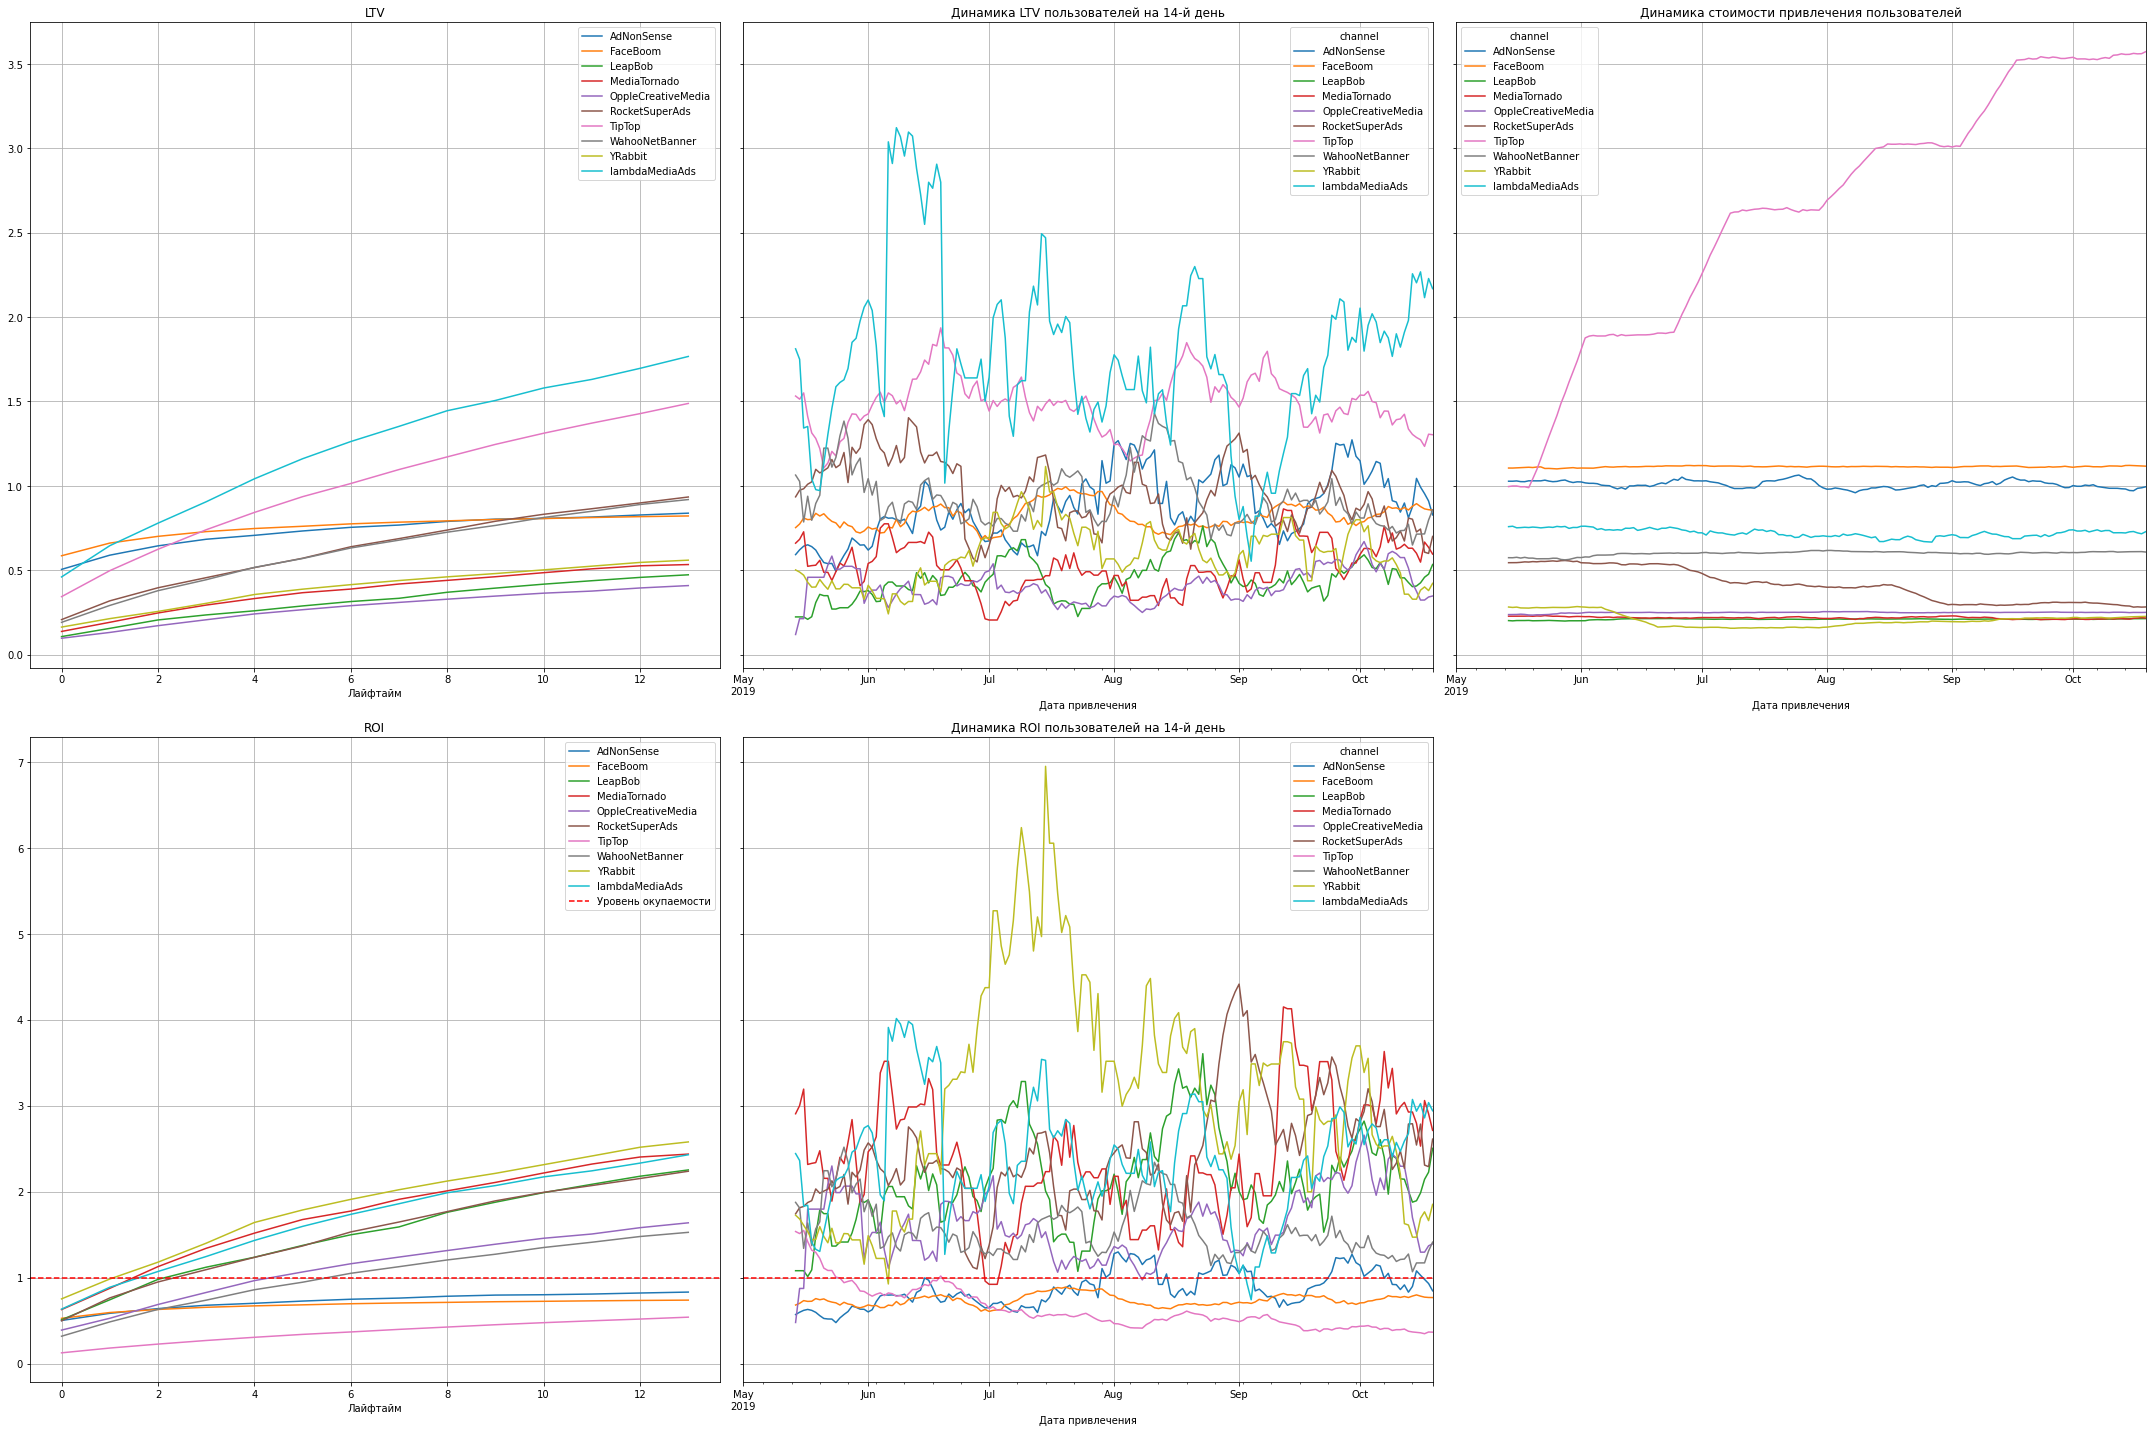

In [29]:
# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Наилучшее значение LTV и динамики по каналам показывают lambdaMediaAds и TipTop. У TipTop при этом всё время наблюдения растёт стоимость привлечения пользователей. Ситуация у TipTop тем более печальная, что при самом высоком показателе CAC (причём с большим отрывом от остальных), он имеет самый низкий (и не окупающийся) показатель ROI. Довольно высокий, но стабильный уровень затрат на привлечение у FaceBoom.
LTV AdNonSense и FaceBoom начиная с 8-го лайфтайма почти перестают расти.
Привлечение по каналам AdNonSense, FaceBoom и, особенно, TipTop не окупается. В последнем случае затраты в разы выше, чем у любого другого канала.
Наилучшие показатели ROI характерны для YRabbit, MediaTornado и lambdaMediaAds. При этом YRabbit имеет самую низкую стоимость привлечения, а MediaTornado - одну из самых низких.

### Проанализируйте конверсию с разбивкой по устройствам.

In [30]:
result_raw, conversion, conversion_in_time = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)
display(conversion)
display(conversion_in_time)

cohort_size       0.0       1.0       2.0       3.0       4.0  \
device                                                                   
Android        33288  0.040675  0.046593  0.049597  0.051400  0.052932   
Mac            28588  0.044494  0.050861  0.053764  0.055723  0.056912   
PC             28978  0.033508  0.038685  0.040928  0.042688  0.044309   
iPhone         51766  0.043252  0.048970  0.051926  0.054225  0.055674   

              5.0       6.0       7.0       8.0       9.0      10.0      11.0  \
device                                                                          
Android  0.053803  0.054704  0.055275  0.055696  0.056267  0.056537  0.056837   
Mac      0.057961  0.058731  0.059431  0.060025  0.060690  0.061075  0.061214   
PC       0.045241  0.046104  0.046829  0.047415  0.047795  0.048002  0.048140   
iPhone   0.056562  0.057219  0.058030  0.058629  0.059093  0.059363  0.059672   

             12.0      13.0  
device                       
Android  0.057138  0.057258  
Mac      0.061284  0.061634  
PC       0.048278  0.048554  
iPhone   0.059827  0.060020

cohort_size       0.0       1.0       2.0       3.0  \
device  dt                                                                
Android 2019-05-01          207  0.038647  0.043478  0.043478  0.043478   
        2019-05-02          177  0.016949  0.022599  0.028249  0.028249   
        2019-05-03          204  0.039216  0.044118  0.053922  0.053922   
        2019-05-04          232  0.047414  0.051724  0.056034  0.056034   
        2019-05-05          235  0.025532  0.025532  0.025532  0.025532   
...                         ...       ...       ...       ...       ...   
iPhone  2019-10-15          249  0.032129  0.032129  0.032129  0.032129   
        2019-10-16          236  0.033898  0.033898  0.042373  0.042373   
        2019-10-17          256  0.058594  0.062500  0.070312  0.074219   
        2019-10-18          305  0.068852  0.075410  0.075410  0.078689   
        2019-10-19          349  0.051576  0.051576  0.054441  0.063037   

                         4.0       5.0       6.0       7.0       8.0  \
device  dt                                                             
Android 2019-05-01  0.048309  0.048309  0.048309  0.053140  0.057971   
        2019-05-02  0.028249  0.028249  0.028249  0.028249  0.028249   
        2019-05-03  0.053922  0.053922  0.053922  0.053922  0.053922   
        2019-05-04  0.060345  0.060345  0.064655  0.064655  0.064655   
        2019-05-05  0.025532  0.025532  0.025532  0.025532  0.025532   
...                      ...       ...       ...       ...       ...   
iPhone  2019-10-15  0.036145  0.036145  0.036145  0.036145  0.036145   
        2019-10-16  0.042373  0.046610  0.046610  0.046610  0.050847   
        2019-10-17  0.078125  0.078125  0.078125  0.078125  0.082031   
        2019-10-18  0.078689  0.078689  0.078689  0.078689  0.078689   
        2019-10-19  0.063037  0.065903  0.065903  0.065903  0.068768   

                         9.0      10.0      11.0      12.0      13.0  
device  dt                                                            
Android 2019-05-01  0.057971  0.057971  0.057971  0.057971  0.057971  
        2019-05-02  0.028249  0.033898  0.033898  0.033898  0.033898  
        2019-05-03  0.053922  0.053922  0.053922  0.053922  0.053922  
        2019-05-04  0.064655  0.064655  0.064655  0.064655  0.064655  
        2019-05-05  0.025532  0.025532  0.025532  0.025532  0.025532  
...                      ...       ...       ...       ...       ...  
iPhone  2019-10-15  0.036145  0.036145  0.036145  0.036145  0.036145  
        2019-10-16  0.050847  0.050847  0.050847  0.050847  0.050847  
        2019-10-17  0.082031  0.082031  0.082031  0.082031  0.082031  
        2019-10-18  0.078689  0.078689  0.078689  0.078689  0.078689  
        2019-10-19  0.068768  0.068768  0.068768  0.071633  0.071633  

[688 rows x 15 columns]

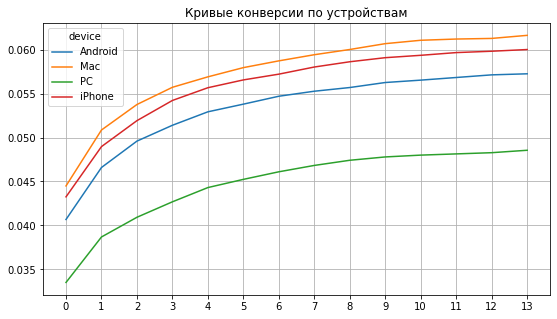

In [31]:
plt.figure(figsize = (20, 5)) 

# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = conversion.drop(columns = ['cohort_size'])


report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии по устройствам')

plt.show() 

Здесь наблюдаем парадокс. Пользователи - владельцы техники Apple (Mac и iPhone) конвертируются лучше всего, хотя именно они и не окупаются.

### Проанализируйте конверсию с разбивкой по странам.

In [32]:
result_raw, conversion, conversion_in_time = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)
display(conversion)
display(conversion_in_time)

cohort_size       0.0       1.0       2.0       3.0       4.0  \
region                                                                         
France               16624  0.024362  0.028152  0.030618  0.032122  0.033446   
Germany              14244  0.025274  0.030890  0.033418  0.035383  0.036226   
UK                   16710  0.025913  0.029922  0.032615  0.033872  0.035009   
United States        95042  0.048799  0.055270  0.058206  0.060436  0.062057   

                    5.0       6.0       7.0       8.0       9.0      10.0  \
region                                                                      
France         0.034288  0.034889  0.035190  0.035671  0.036153  0.036273   
Germany        0.037209  0.037770  0.038472  0.039034  0.039385  0.039455   
UK             0.035667  0.036505  0.037044  0.037283  0.037642  0.037882   
United States  0.063035  0.063867  0.064687  0.065308  0.065876  0.066223   

                   11.0      12.0      13.0  
region                                       
France         0.036634  0.036754  0.036814  
Germany        0.039525  0.039596  0.040017  
UK             0.037941  0.038061  0.038121  
United States  0.066497  0.066697  0.066949

cohort_size       0.0       1.0       2.0       3.0  \
region        dt                                                                
France        2019-05-01          113  0.008850  0.017699  0.017699  0.017699   
              2019-05-02           78  0.012821  0.012821  0.012821  0.012821   
              2019-05-03          106  0.047170  0.047170  0.047170  0.047170   
              2019-05-04           96  0.031250  0.031250  0.031250  0.031250   
              2019-05-05          112  0.017857  0.017857  0.017857  0.017857   
...                               ...       ...       ...       ...       ...   
United States 2019-10-15          449  0.053452  0.053452  0.055679  0.057906   
              2019-10-16          435  0.043678  0.048276  0.057471  0.057471   
              2019-10-17          490  0.051020  0.057143  0.063265  0.063265   
              2019-10-18          602  0.059801  0.063123  0.066445  0.066445   
              2019-10-19          612  0.058824  0.062092  0.065359  0.070261   

                               4.0       5.0       6.0       7.0       8.0  \
region        dt                                                             
France        2019-05-01  0.017699  0.017699  0.017699  0.017699  0.017699   
              2019-05-02  0.012821  0.012821  0.012821  0.012821  0.012821   
              2019-05-03  0.047170  0.047170  0.047170  0.047170  0.047170   
              2019-05-04  0.041667  0.041667  0.041667  0.041667  0.041667   
              2019-05-05  0.017857  0.017857  0.017857  0.017857  0.017857   
...                            ...       ...       ...       ...       ...   
United States 2019-10-15  0.060134  0.062361  0.064588  0.064588  0.064588   
              2019-10-16  0.057471  0.059770  0.059770  0.059770  0.064368   
              2019-10-17  0.065306  0.065306  0.067347  0.067347  0.069388   
              2019-10-18  0.066445  0.068106  0.069767  0.069767  0.069767   
              2019-10-19  0.070261  0.073529  0.073529  0.075163  0.075163   

                               9.0      10.0      11.0      12.0      13.0  
region        dt                                                            
France        2019-05-01  0.017699  0.017699  0.017699  0.017699  0.017699  
              2019-05-02  0.012821  0.012821  0.012821  0.012821  0.012821  
              2019-05-03  0.047170  0.047170  0.047170  0.047170  0.047170  
              2019-05-04  0.041667  0.041667  0.041667  0.041667  0.041667  
              2019-05-05  0.017857  0.017857  0.017857  0.017857  0.017857  
...                            ...       ...       ...       ...       ...  
United States 2019-10-15  0.064588  0.064588  0.064588  0.064588  0.064588  
              2019-10-16  0.064368  0.064368  0.064368  0.064368  0.066667  
              2019-10-17  0.069388  0.069388  0.069388  0.069388  0.069388  
              2019-10-18  0.071429  0.073090  0.073090  0.073090  0.073090  
              2019-10-19  0.075163  0.075163  0.076797  0.078431  0.078431  

[688 rows x 15 columns]

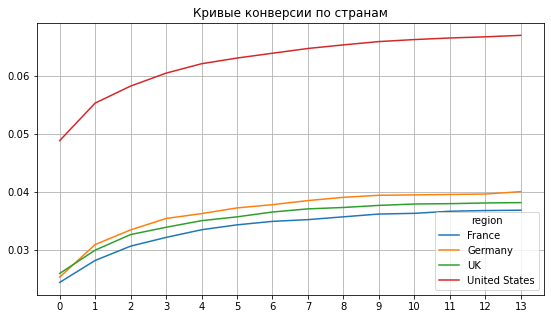

In [33]:
plt.figure(figsize = (20, 5)) 

# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = conversion.drop(columns = ['cohort_size'])

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии по странам')

plt.show() 

Снова наблюдаем парадокс. Пользователи из США показывают самый высокий уровень конверсии

### Проанализируйте конверсию с разбивкой по рекламным каналам.

In [34]:
result_raw, conversion, conversion_in_time = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)
display(conversion)
display(conversion_in_time)

cohort_size       0.0       1.0       2.0       3.0  \
channel                                                                   
AdNonSense                 3702  0.086980  0.094003  0.096704  0.100486   
FaceBoom                  27544  0.102091  0.109134  0.111494  0.113346   
LeapBob                    8103  0.016660  0.020610  0.024065  0.025052   
MediaTornado               4167  0.023278  0.027358  0.028078  0.029998   
OppleCreativeMedia         8139  0.017324  0.019904  0.021501  0.023099   
RocketSuperAds             4251  0.034110  0.047283  0.053870  0.059280   
TipTop                    18498  0.056709  0.069413  0.076062  0.080711   
WahooNetBanner             8082  0.031180  0.038481  0.043306  0.045038   
YRabbit                    4102  0.025841  0.028766  0.031204  0.032179   
lambdaMediaAds             2056  0.072471  0.081712  0.085117  0.088521   
organic                   53976  0.011635  0.014488  0.015877  0.016952   

                         4.0       5.0       6.0       7.0       8.0  \
channel                                                                
AdNonSense          0.102107  0.103998  0.105348  0.105348  0.105889   
FaceBoom            0.114762  0.115452  0.116468  0.116976  0.117557   
LeapBob             0.026040  0.026657  0.026904  0.027644  0.028261   
MediaTornado        0.030478  0.031198  0.031198  0.032397  0.032637   
OppleCreativeMedia  0.023713  0.024573  0.025310  0.025556  0.025556   
RocketSuperAds      0.063750  0.065632  0.067278  0.068690  0.069866   
TipTop              0.084171  0.086604  0.087685  0.089361  0.090550   
WahooNetBanner      0.046894  0.048008  0.048874  0.049740  0.050359   
YRabbit             0.033398  0.034130  0.034861  0.035349  0.035836   
lambdaMediaAds      0.092412  0.095817  0.099708  0.100681  0.102626   
organic             0.017619  0.017971  0.018434  0.018934  0.019249   

                         9.0      10.0      11.0      12.0      13.0  
channel                                                               
AdNonSense          0.106159  0.106159  0.106969  0.107509  0.107509  
FaceBoom            0.118175  0.118465  0.118864  0.119082  0.119373  
LeapBob             0.028631  0.028878  0.029002  0.029125  0.029248  
MediaTornado        0.032637  0.033357  0.033357  0.033357  0.033357  
OppleCreativeMedia  0.025802  0.025925  0.026047  0.026047  0.026293  
RocketSuperAds      0.071513  0.072924  0.073159  0.073394  0.073630  
TipTop              0.091577  0.092334  0.092767  0.093199  0.093740  
WahooNetBanner      0.051101  0.051472  0.051596  0.051720  0.052091  
YRabbit             0.036324  0.036324  0.036568  0.036811  0.037055  
lambdaMediaAds      0.103113  0.103113  0.103599  0.103599  0.103599  
organic             0.019527  0.019583  0.019694  0.019768  0.019879

cohort_size       0.0       1.0       2.0       3.0  \
channel    dt                                                                
AdNonSense 2019-05-01           39  0.051282  0.076923  0.076923  0.076923   
           2019-05-02           36  0.000000  0.000000  0.000000  0.000000   
           2019-05-03           45  0.044444  0.066667  0.066667  0.066667   
           2019-05-04           51  0.098039  0.098039  0.098039  0.098039   
           2019-05-05           36  0.138889  0.138889  0.138889  0.138889   
...                            ...       ...       ...       ...       ...   
organic    2019-10-15          232  0.012931  0.012931  0.012931  0.017241   
           2019-10-16          220  0.009091  0.013636  0.013636  0.013636   
           2019-10-17          254  0.000000  0.000000  0.003937  0.007874   
           2019-10-18          320  0.006250  0.009375  0.012500  0.012500   
           2019-10-19          323  0.012384  0.015480  0.015480  0.021672   

                            4.0       5.0       6.0       7.0       8.0  \
channel    dt                                                             
AdNonSense 2019-05-01  0.076923  0.076923  0.076923  0.076923  0.076923   
           2019-05-02  0.000000  0.000000  0.000000  0.000000  0.000000   
           2019-05-03  0.066667  0.066667  0.066667  0.066667  0.066667   
           2019-05-04  0.098039  0.098039  0.098039  0.098039  0.098039   
           2019-05-05  0.138889  0.138889  0.138889  0.138889  0.138889   
...                         ...       ...       ...       ...       ...   
organic    2019-10-15  0.017241  0.017241  0.017241  0.017241  0.017241   
           2019-10-16  0.013636  0.013636  0.013636  0.018182  0.027273   
           2019-10-17  0.007874  0.007874  0.007874  0.007874  0.007874   
           2019-10-18  0.012500  0.015625  0.015625  0.015625  0.015625   
           2019-10-19  0.021672  0.021672  0.021672  0.024768  0.024768   

                            9.0      10.0      11.0      12.0      13.0  
channel    dt                                                            
AdNonSense 2019-05-01  0.076923  0.076923  0.076923  0.076923  0.076923  
           2019-05-02  0.000000  0.000000  0.000000  0.000000  0.000000  
           2019-05-03  0.066667  0.066667  0.066667  0.066667  0.066667  
           2019-05-04  0.098039  0.098039  0.098039  0.098039  0.098039  
           2019-05-05  0.138889  0.138889  0.138889  0.138889  0.138889  
...                         ...       ...       ...       ...       ...  
organic    2019-10-15  0.017241  0.017241  0.017241  0.017241  0.017241  
           2019-10-16  0.027273  0.027273  0.027273  0.027273  0.027273  
           2019-10-17  0.007874  0.007874  0.007874  0.007874  0.007874  
           2019-10-18  0.015625  0.015625  0.015625  0.015625  0.015625  
           2019-10-19  0.024768  0.024768  0.024768  0.024768  0.024768  

[1892 rows x 15 columns]

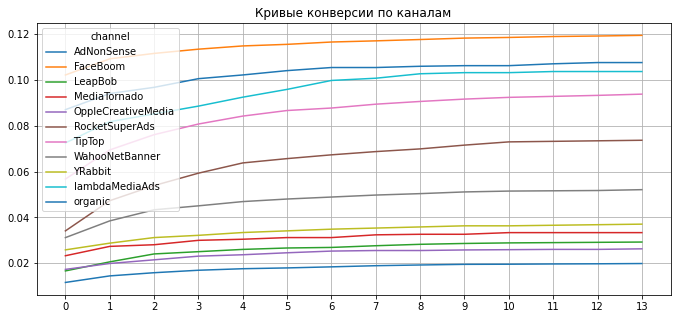

In [35]:
plt.figure(figsize = (25, 5)) 

# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = conversion.drop(columns = ['cohort_size'])

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии по каналам')

plt.show() 

Самая высокая конверсия у пользователей, привлечённых неокупающимся FaceBoom. lambdaMediaAds, находящаяся по этому параметру на третьем месте, тоже не окупается.

### Проанализируйте удержание с разбивкой по устройствам.

In [36]:
result_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device'], ignore_horizon=False
)
display(retention)

cohort_size    0         1         2         3         4  \
payer device                                                              
False Android        31334  1.0  0.176358  0.086583  0.052052  0.033414   
      Mac            26762  1.0  0.176668  0.084635  0.049847  0.032957   
      PC             27539  1.0  0.174916  0.087040  0.050982  0.035114   
      iPhone         48565  1.0  0.178256  0.086770  0.052260  0.035684   
True  Android         1954  1.0  0.407369  0.323439  0.271238  0.227226   
      Mac             1826  1.0  0.389376  0.301752  0.227273  0.208105   
      PC              1439  1.0  0.439194  0.357887  0.286310  0.282140   
      iPhone          3201  1.0  0.396439  0.302718  0.259294  0.212434   

                      5         6         7         8         9        10  \
payer device                                                                
False Android  0.024223  0.017649  0.014393  0.010851  0.009925  0.008074   
      Mac      0.024550  0.019206  0.013826  0.012294  0.009641  0.007996   
      PC       0.024583  0.017285  0.013908  0.011620  0.008969  0.007480   
      iPhone   0.024647  0.019191  0.013878  0.012293  0.009389  0.007557   
True  Android  0.225179  0.181679  0.177584  0.160696  0.151484  0.149437   
      Mac      0.192771  0.169770  0.159912  0.155531  0.147317  0.136911   
      PC       0.230716  0.233495  0.207783  0.198749  0.167477  0.166782   
      iPhone   0.199313  0.181193  0.163699  0.151515  0.145267  0.148704   

                     11        12        13  
payer device                                 
False Android  0.006510  0.005521  0.004532  
      Mac      0.006390  0.006128  0.004372  
      PC       0.006391  0.005883  0.004866  
      iPhone   0.006919  0.005951  0.004551  
True  Android  0.126919  0.135619  0.124872  
      Mac      0.130887  0.125958  0.121577  
      PC       0.163308  0.157748  0.151494  
      iPhone   0.135270  0.125273  0.105904

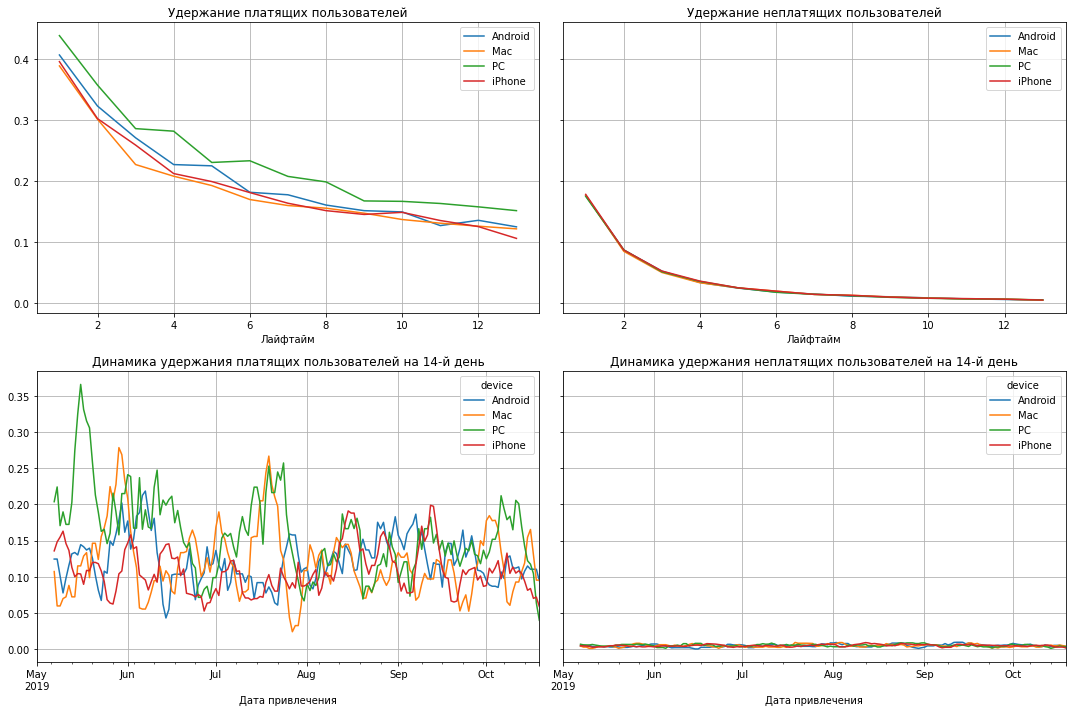

In [37]:
plot_retention(retention, retention_history, horizon_days) 

В удержании с разбивкой по устройствам разницы практически нет.

### Проанализируйте удержание с разбивкой по странам.

In [38]:
result_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region'], ignore_horizon=False
)
display(retention)

cohort_size    0         1         2         3         4  \
payer region                                                                    
False France               15996  1.0  0.176232  0.088835  0.052638  0.034634   
      Germany              13660  1.0  0.173939  0.084627  0.052562  0.034480   
      UK                   16051  1.0  0.176438  0.088468  0.051461  0.033705   
      United States        88493  1.0  0.177426  0.085792  0.051089  0.034613   
True  France                 628  1.0  0.484076  0.404459  0.328025  0.310510   
      Germany                584  1.0  0.498288  0.438356  0.330479  0.320205   
      UK                     659  1.0  0.502276  0.437026  0.344461  0.314112   
      United States         6549  1.0  0.378989  0.285387  0.238357  0.201710   

                            5         6         7         8         9  \
payer region                                                            
False France         0.022381  0.019130  0.015129  0.010690  0.009690   
      Germany        0.025183  0.018375  0.013836  0.012225  0.009810   
      UK             0.025419  0.017881  0.014579  0.011588  0.009034   
      United States  0.024635  0.018431  0.013707  0.012001  0.009470   
True  France         0.302548  0.254777  0.243631  0.221338  0.211783   
      Germany        0.292808  0.261986  0.241438  0.250000  0.214041   
      UK             0.288316  0.288316  0.259484  0.223065  0.171472   
      United States  0.184914  0.164605  0.152237  0.143075  0.137426   

                           10        11        12        13  
payer region                                                 
False France         0.008002  0.006189  0.005376  0.005376  
      Germany        0.007613  0.006955  0.006296  0.005490  
      UK             0.008161  0.007788  0.006479  0.003925  
      United States  0.007650  0.006419  0.005786  0.004407  
True  France         0.214968  0.170382  0.200637  0.191083  
      Germany        0.227740  0.186644  0.176370  0.159247  
      UK             0.177542  0.198786  0.186646  0.197269  
      United States  0.133303  0.123378  0.117728  0.103833

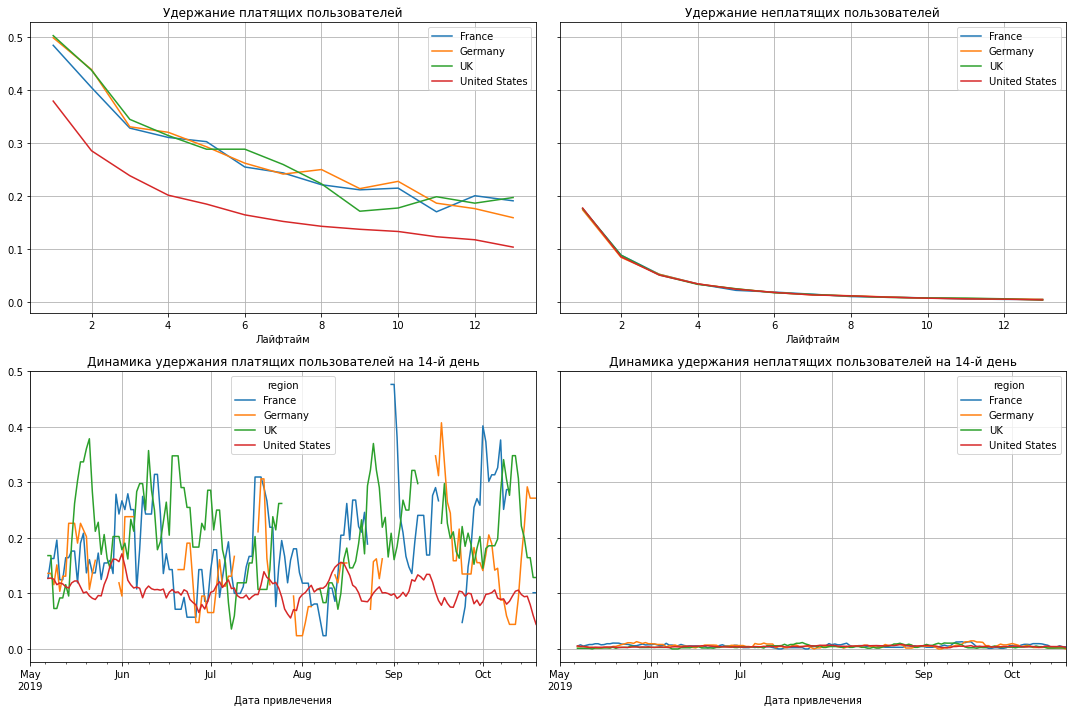

In [39]:
plot_retention(retention, retention_history, horizon_days) 

В удержании платящих пользователей самое низкое, хотя конверсия самая высокая. И число платящих пользователей из США составляет 77.8% от их общего числа. По какой-то причине пользователи теряют интерес после первых покупок. Возможно, им нравится идея, но не нравится её реализация. Или пользователи из этой страны сталкиваются с техническими проблемами. Наименьшее удержание так же свойственно владельцам устройств Mac и iPhone, которые, вероятно, в массе своей являются американцами.

### Проанализируйте удержание с разбивкой по рекламным каналам.

In [40]:
result_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel'], ignore_horizon=False
)
display(retention)

cohort_size    0         1         2         3  \
payer channel                                                              
False AdNonSense                 3289  1.0  0.176345  0.087565  0.051079   
      FaceBoom                  24182  1.0  0.172980  0.087214  0.050782   
      LeapBob                    7860  1.0  0.171120  0.091349  0.051272   
      MediaTornado               4019  1.0  0.183130  0.082359  0.056482   
      OppleCreativeMedia         7919  1.0  0.171991  0.089026  0.053416   
      RocketSuperAds             3916  1.0  0.175179  0.085802  0.051328   
      TipTop                    16713  1.0  0.181715  0.084605  0.050859   
      WahooNetBanner             7654  1.0  0.184217  0.085446  0.053044   
      YRabbit                    3946  1.0  0.180182  0.083376  0.049164   
      lambdaMediaAds             1836  1.0  0.183007  0.086601  0.062636   
      organic                   52866  1.0  0.176711  0.085991  0.050921   
True  AdNonSense                  413  1.0  0.285714  0.162228  0.130751   
      FaceBoom                   3362  1.0  0.222487  0.123141  0.075253   
      LeapBob                     243  1.0  0.555556  0.493827  0.395062   
      MediaTornado                148  1.0  0.500000  0.452703  0.351351   
      OppleCreativeMedia          220  1.0  0.536364  0.459091  0.400000   
      RocketSuperAds              335  1.0  0.573134  0.468657  0.400000   
      TipTop                     1785  1.0  0.532773  0.464426  0.408964   
      WahooNetBanner              428  1.0  0.553738  0.511682  0.387850   
      YRabbit                     156  1.0  0.564103  0.384615  0.397436   
      lambdaMediaAds              220  1.0  0.563636  0.490909  0.395455   
      organic                    1110  1.0  0.561261  0.472973  0.418919   

                                 4         5         6         7         8  \
payer channel                                                                
False AdNonSense          0.037093  0.021587  0.018851  0.016722  0.011250   
      FaceBoom            0.032710  0.025267  0.019767  0.013605  0.011910   
      LeapBob             0.032443  0.023155  0.018830  0.014504  0.010941   
      MediaTornado        0.028614  0.024882  0.018661  0.011694  0.015924   
      OppleCreativeMedia  0.032201  0.026266  0.019194  0.014522  0.011870   
      RocketSuperAds      0.035495  0.020684  0.015066  0.016343  0.008682   
      TipTop              0.034943  0.026028  0.018848  0.013941  0.012086   
      WahooNetBanner      0.034492  0.022211  0.017507  0.015025  0.011759   
      YRabbit             0.035226  0.023822  0.016219  0.014192  0.009883   
      lambdaMediaAds      0.033224  0.031046  0.016340  0.014161  0.010893   
      organic             0.036016  0.024231  0.018121  0.013695  0.011955   
True  AdNonSense          0.077482  0.060533  0.058111  0.048426  0.055690   
      FaceBoom            0.057406  0.041344  0.038667  0.028257  0.020523   
      LeapBob             0.333333  0.395062  0.288066  0.246914  0.271605   
      MediaTornado        0.344595  0.351351  0.250000  0.229730  0.216216   
      OppleCreativeMedia  0.395455  0.313636  0.336364  0.272727  0.236364   
      RocketSuperAds      0.394030  0.331343  0.322388  0.325373  0.262687   
      TipTop              0.352381  0.345658  0.288515  0.287395  0.277871   
      WahooNetBanner      0.448598  0.383178  0.338785  0.345794  0.313084   
      YRabbit             0.371795  0.275641  0.262821  0.230769  0.262821   
      lambdaMediaAds      0.372727  0.372727  0.340909  0.327273  0.272727   
      organic             0.336036  0.327928  0.326126  0.283784  0.277477   

                                 9        10        11        12        13  
payer channel                                                               
False AdNonSense          0.011250  0.006081  0.005473  0.006993  0.006689  
      FaceBoom            0.010007  0.008064  0.005500  0.006616  0.004342  
      LeapBob       

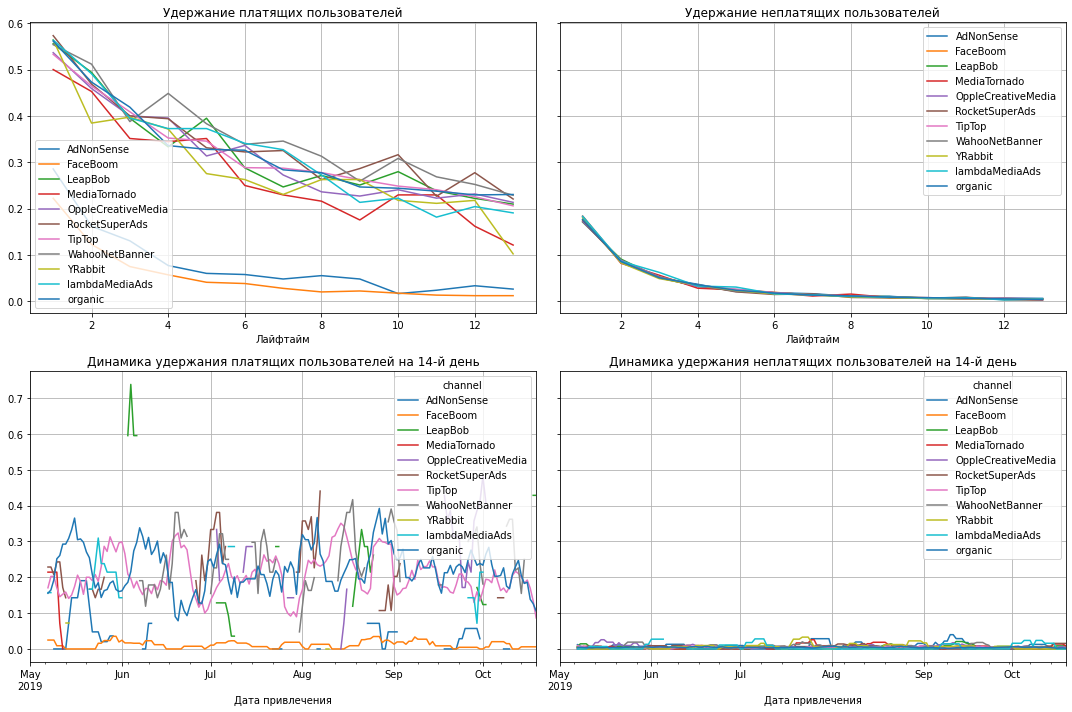

In [41]:
plot_retention(retention, retention_history, horizon_days) 

При изучении удержания платящих пользователей по каналам выясняем, что FaceBoom даёт очень плохой результат. Удержание здесь ниже, чем у organic, при том, что САС у FaceBoom достаточно высокий и уступает только огромному САС TipTop.

В целом реклама не окупается. Окупаемость рекламы сильно снижается за счёт пользователей из США, техники Apple (Mac, iPhone) и каналов рекламы, таких как: TipTop, FaceBoom, AdNonSense. Проблемы, возможно связанны не с используемыми устройствами или страной. США показывают самый высокий уровень конверсии. Уровень удержания здесь самый низкий из четырёх стран, но не провальный. Среди устройств наиболее высокие показатели этих метрик у владельцев Mac и iPhone. Следовательно американцы и владельцы техники Apple (скорее всего это одни и те же люди) не испытывают технических проблем со входом в приложение оплатой и пр. При этом именно США и владельцы перечисленных устройств "роняют" окупаемость (при этом стоит помнить, что доля пользователей из США составляет 77.8% от общего числа пользователей). Следовательно проблему окупаемости создают каналы TipTop, FaceBoom, AdNonSense, привлечение по которым слишком дорого обходится (особенно это касается TipTop, FaceBoom, AdNonSense). Можно предположить, что именно по этим каналам американцы получают рекламную информацию о приложении.
Рекомендации:
1. Проверить версию о том, что каналы TipTop, FaceBoom, AdNonSense использованы на территории США.
2. Проверить версию о том, что владельцы устройств Mac и  iPhone по преимуществу американцы.
3. Найти более дешёвые каналы привлечения, чем TipTop и FaceBoom. Возможно стоит поменять метод оплаты рекламы.
4. Проанализировать характер взаимодействия владельцев устройств Mac и  iPhone с приложением. Их удержание несколько ниже, чем владельцев PC и Android.
5. Выяснить, почему пользователи, пришедшие через FaceBoom показывают уровень удержания ниже organic. Или просто отказаться от этого канала, учитывая его относительную дороговизну в сравнении со всеми остальными кроме TipTop


## Общий вывод.

# Шаг 6. Напишите выводы<a id="outcom"></a>
Окупаемость "проваливается" в трёх моментах:
 - Заметная дороговизна трёх рекламных каналов. Привлечение посредством TipTop, FaceBoom, AdNonSense обходится заметно дороже, чем при помощи остальных каналов. TipTop - практически финансовая "чёрная дыра".
 - Низкий уровень удержания пользователей (ниже organic), пришедших через FaceBoom. Возможно канал привлекает пользователей, не относящихся к целевой аудитории.
 - Перечисленные каналы привлечения скорее всего работают в США, из которых и приходит 77.8% всех пользователей.
 
Рекомендации для отдела маркетинга для повышения эффективности.
 -  Проверить версию о том, что каналы TipTop, FaceBoom, AdNonSense использованы на территории США.
 - Проверить версию о том, что владельцы устройств Mac и  iPhone по преимуществу американцы.
 - Найти более дешёвые каналы привлечения, чем TipTop и FaceBoom. Возможно стоит поменять метод оплаты рекламы. От TipTop нужно безусловно отказаться
 - Проанализировать характер взаимодействия владельцев устройств Mac и  iPhone с приложением. Их удержание несколько ниже, чем владельцев PC и Android.
 - Выяснить причины низкого удержания в США. Возможно стоит искать технические проблемы, с которыми сталкиваются пользователи. Или выяснить, каковы впечатления американцев от взаимодействия с приложением. Это важно, с учётом того, что именно пользователи из США - основная аудитория приложения
 - Выяснить, почему пользователи, пришедшие через FaceBoom показывают уровень удержания ниже organic. Переориентировать его на нужную целевую аудиторию или просто отказаться от этого канала, учитывая его относительную дороговизну в сравнении со всеми остальными кроме TipTop.
 - Заменить убыточные каналы можно на  YRabbit, MediaTornado и lambdaMediaAds. Наиболее предпочтительным будет YRabbit имеющий самую низкую стоимость привлечения и самый высокий ROI. lambdaMediaAds и MediaTornado имеют практически идентичный, 2-й по величине показатель ROI, причём  lambdaMediaAds имеет самый высокий показатель LTV и довольно низкую стоимость привлечения. MediaTornado имеет один из самых низких показателей CAC.